# <center> Fashion MNIST Classification <center>


# 1. Desires and Objectives

## 1.1. Introduction

"Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes."[<sup>[1]</sup>]

As outlined on the TensorFlow website, this dataset is labelled for supervised learning. The image format is (1, 28, 28), with the first element set to 1 due to its grayscale nature which represents the number of color channels, and the image type is unit8. The labels are represented as int64.

The dataset is also available on GitHub.[<sup>[2]</sup>]

Each training and test example falls into one of the following categories:
- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

## 1.2. Aims and Objectives

The primary goal here is to identify the most optimal model that can learn and classify based on knowledge gained from AI classes and labs conducted by Jérémie Wenger, as well as insights gained from the book "Deep Learning with Python" by François Chollet.

To accomplish this, the following strategies will be applied:
- Altering activation functions
- Modifying optimizers
- Adjusting the number of neurons in layers
- Adding a hidden layer
- Employing K-fold validation
- Employing K-fold shuffling
- Applying dropout technique
- Applying the regularization technique

## 1.3. Success Criteria

Our standard model is the one provided on the TensorFlow website. Any improvements beyond this will be considered a success.
It is worth mentioning that high accuracy might not always lead to learning in our model, sometimes the model will memorise the data instead of learning (overfitting), and the memorising causes a serious problem when we try our model in a testing data, which the model have never seen before and will lead to a failure.

# 2. Initiating the Procedure

## 2.1. Importing Libraries and Data Loading

The first step involves importing the necessary libraries and loading the data from TensorFlow.
We will import `TensorFlow` to define our model, save the results and also import our chosen data which is available in TensorFlow, `Numpy` for modifying matrixes, and `matplotplib` for demonstrating our results.
We also import `Kfold` from `sklearn.model_selection` for k-fold validation which is one of the techniques mentioned in Chollet's book.


[1]: #References
[2]: #References

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import keras.callbacks

We define a number (in this case 69) for `random.set_seed` to get the same random set generated by TensorFlow every time.
This process is crucial as it allows us to obtain the same results when running out of code again and make it easier for our further experiments.

In [2]:
tf.random.set_seed(69) 

In [3]:
#loading data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Below, we provide a concise overview of our data. The following code segments (including the overview, the table, and the initial image from our training set). They are adapted from the lecturer's notebooks.

In [4]:
def Overview(rows, cols, figsize=None):
    
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    for i in range(rows):
        for j in range(cols):
            axs[i, j].imshow(x_train[i * cols + j], cmap=plt.cm.binary)

An overview of the first 16 pictures from our training set, in a 4 by 4 plot:

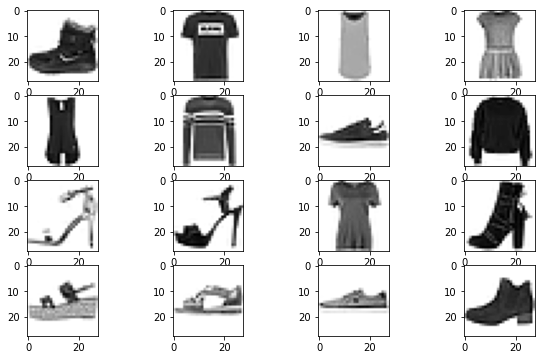

In [5]:
Overview(4, 4, figsize=(10, 6))

A table that define shape (consisting of number of data in each set, image size width, image size length):

In [6]:
print("tensor:\t\t shape")
print("-"*22)
print("training images:", x_train.shape)
print("training labels:", y_train.shape)
print("test images:\t", x_test.shape)
print("test labels:\t", y_test.shape)

tensor:		 shape
----------------------
training images: (60000, 28, 28)
training labels: (60000,)
test images:	 (10000, 28, 28)
test labels:	 (10000,)


label:  9


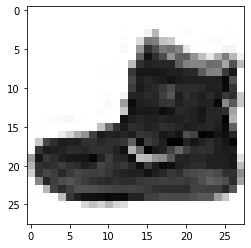

In [7]:
# inspect the first image of our training set
print('label: ', y_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

## 2.2. Initial Model

The model used as our first attempt is the example provided on the TensorFlow website.

## 2.3. Data Pre-processing

### 2.3.1. Data Normalization

To prepare our data for processing, the initial step involves normalizing both the training and test datasets. This normalization is accomplished by dividing each pixel value by 255.0. The choice of 255.0 arises from the typical pixel value range of 0 to 255 in grayscale images and dividing by 255.0 scales these values to a range of 0 to 1, ensuring they are represented as floating-point numbers.

### 2.3.2. Splitting Training Data

We further divide our training data into two subsets: partial training and validation training. This division serves two primary purposes. Firstly, it prevents any potential information leakage by avoiding the use of test data for validation. Secondly, it allows us to identify and address any model-related issues before proceeding with the testing phase.

In [8]:
x_train = x_train / 255.0

x_test = x_test / 255.0

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

x_val = x_train[:10000]
y_val = y_train[:10000]

The following code segments for constructing the model and generating plots are used from the lecturer's code.

We will proceed to define a new model, initializing a fresh training session.  The initial step is the conversion of the elements within our image matrix into a 1D array, and changing them into a single row. In the hidden layer, we define 128 neurons employing the `relu` activation function, which passes the same number if the input is greater than 0, and 0 if it's less than 0. The final layer comprises 10 neurons, each representing one of the classes from our labels.

## 2.4. Model Construction

Subsequently, we define our model's parameters, including the choice of `optimizer` (an algorithm or method for adjusting weights and biases, where the learning rate can also be defined), `loss` (selected based on the model type, in this case, computing cross-entropy loss between the labels and predictions), and `metrics` ("A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric").[<sup>[3]</sup>] 

[3]: #References

In [9]:
# building model
def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
        ])
    model.compile(optimizer='adam',
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=['accuracy'])
    return model
model = build_model()

Testing the network's performance prior to training, the accuracy in this model is approximately 9.5%.

In [10]:
model.evaluate(partial_x_train, partial_y_train)

1563/1563 [==============================] - 2s 1ms/step - loss: 2.4258 - accuracy: 0.0942


[2.4258313179016113, 0.09415999799966812]

Training our network by the defined parameters, `epochs` is defined 10 (which is one complete pass through our entire training dataset)[<sup>[4]</sup>]  and `batch_size` is 128 (which is the hyperparameter that defines the number of samples to work through before updating the internal model parameters)[<sup>[5]</sup>] and then saving them into a dictionary.

[4]: #References
[5]: #References

In [11]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)
history_dict = history.history

Epoch 1/10
391/391 - 2s - loss: 0.5812 - accuracy: 0.8000 - val_loss: 0.4381 - val_accuracy: 0.8496 - 2s/epoch - 5ms/step
Epoch 2/10
391/391 - 1s - loss: 0.4136 - accuracy: 0.8537 - val_loss: 0.3945 - val_accuracy: 0.8624 - 1s/epoch - 3ms/step
Epoch 3/10
391/391 - 1s - loss: 0.3729 - accuracy: 0.8679 - val_loss: 0.3695 - val_accuracy: 0.8679 - 1s/epoch - 3ms/step
Epoch 4/10
391/391 - 1s - loss: 0.3463 - accuracy: 0.8766 - val_loss: 0.3494 - val_accuracy: 0.8742 - 1s/epoch - 3ms/step
Epoch 5/10
391/391 - 1s - loss: 0.3270 - accuracy: 0.8825 - val_loss: 0.3533 - val_accuracy: 0.8728 - 1s/epoch - 3ms/step
Epoch 6/10
391/391 - 1s - loss: 0.3124 - accuracy: 0.8868 - val_loss: 0.3523 - val_accuracy: 0.8680 - 1s/epoch - 3ms/step
Epoch 7/10
391/391 - 2s - loss: 0.2975 - accuracy: 0.8925 - val_loss: 0.3427 - val_accuracy: 0.8758 - 2s/epoch - 4ms/step
Epoch 8/10
391/391 - 1s - loss: 0.2834 - accuracy: 0.8980 - val_loss: 0.3236 - val_accuracy: 0.8836 - 1s/epoch - 3ms/step
Epoch 9/10
391/391 - 1s 

Our accuracy is getting around 90%, and the validation accuracy is 88%. These results align with the predictions provided by TensorFlow on its website.

## 2.5. Demonstrating

In the following cell, we visualize the training and validation accuracy as well as the training and validation loss, for a comparative view of these metrics.

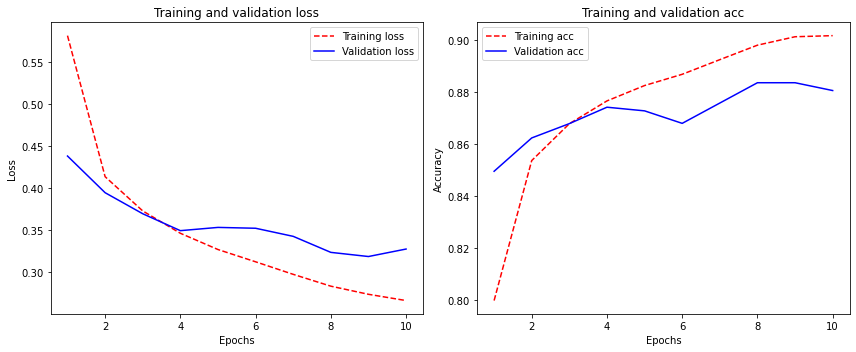

In [12]:
import matplotlib.pyplot as plt

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

red_dash = "r--"
solid_blue_line = "b"

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1
axes[0].plot(epochs, loss, red_dash, label="Training loss")
axes[0].plot(epochs, val_loss, solid_blue_line, label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# exporting accuracy and validation accuracy from the history dictionary
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

# Subplot 2
axes[1].plot(epochs, acc, red_dash, label="Training acc")
axes[1].plot(epochs, val_acc, solid_blue_line, label="Validation acc")
axes[1].set_title("Training and validation acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout() 
plt.show()


We can observe that the accuracy begins to decrease after the fourth epoch and then shows signs of improvement once more from the sixth epoch until the eighth. The loss also starts to increase from epoch 4 to 6 and then decreases until epoch 9.

# 3. Defining Activation Function & Optimizers

## 3.1. Activation Function & Optimizers overview

In the following sections, we will test our model with different optimizers and activation functions in an effort to achieve improved results. These modifications will be summarized in a data frame at the end.
Here is a quick review from the Keras[<sup>[3]</sup>] website about different the optimizers:

- Adam: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

- Adelta: Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:
    - The continual decay of learning rates throughout training.
    - The need for a manually selected global learning rate.
    
- Adagrad: Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.

- Adamax: Adamax, a variant of Adam based on the infinity norm, is a first-order gradient-based optimization method. Due to its capability of adjusting the learning rate based on data characteristics, it is suited to learn time-variant process, e.g., speech data with dynamically changed noise conditions.

- FTRL: "Follow The Regularized Leader" (FTRL) is an optimization algorithm developed at Google for click-through rate prediction in the early 2010s. It is most suitable for shallow models with large and sparse feature spaces. The algorithm is described by McMahan et al., 2013. The Keras version has support for both online L2 regularization (the L2 regularization described in the paper above) and shrinkage-type L2 regularization (which is the addition of an L2 penalty to the loss function).

- Nadam: Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum. (Nestrove momentum is a slightly modified version of momentum)

- RMSprop: The gist of RMSprop is to:
    - Maintain a moving (discounted) average of the square of gradients
    - Divide the gradient by the root of this average
    - note: This implementation of RMSprop uses plain momentum, not Nesterov momentum.

- SGD: Gradient descent (with momentum) optimizer.

The Keras website also noted the following about the activation functions, It is worth noting that all the following functions are mathamatical functions which will converge our data by their definition

- Sigmoid: It is defined as: sigmoid(x) = 1 / (1 + exp(-x)). For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

- elu: Exponential Linear Unit.The exponential linear unit (ELU) with alpha > 0 is define as:
    - x if x > 0
    - alpha * exp(x) - 1 if x < 0
    - note: ELUs have negative values which pushes the mean of the activations closer to zero.
    
- relu: Applies the rectified linear unit activation function. With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

- exponential: Exponential activation function.

- gelu: Gaussian error linear unit (GELU) activation function. The Gaussian error linear unit (GELU) is defined as:
    - gelu(x) = x * P(X <= x) where P(X) ~ N(0, 1), i.e. gelu(x) = 0.5 * x * (1 + erf(x / sqrt(2))).
    - note: GELU weights inputs by their value, rather than gating inputs by their sign as in ReLU.
   
- hard_sigmoid: The hard sigmoid activation is defined as:
    - 0 if x < -2.5
    - 1 if x > 2.5
    - 0.2 * x + 0.5 if -2.5 <= x <= 2.5
    - note: It's a faster, piecewise linear approximation of the sigmoid activation.
    
- Mish: mish(x) = x * tanh(softplus(x))
    - where softplus is defined as: softplus(x) = log(exp(x) + 1)

- selu: The Scaled Exponential Linear Unit (SELU) activation function is defined as:
    - scale * x if x > 0
    - scale * alpha * (exp(x) - 1) if x < 0
    - note: where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098).

- softmax: Softmax converts a vector of values to a probability distribution. The elements of the output vector are in range [0, 1] and sum to 1. Each input vector is handled independently. The axis argument sets which axis of the input the function is applied along. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution. The softmax of each vector x is computed as exp(x) / sum(exp(x)).

- softplus: softplus(x) = log(exp(x) + 1)

- softsign: softsign(x) = x / (abs(x) + 1)

- swish: swish(x) = x * sigmoid(x)

- tanh: tanh(x) = ((exp(x) - exp(-x)) / (exp(x) + exp(-x)))

## 3.2. Predicting Activation Function & Optimizers

By the previous definition, we can somehow guess which optimizers and activation functions might be useful for our data, or in other words which ones are not suitable for it.
We can guess that `FTRL` won't be a proper optimizer for our chosen dataset. Adam optimizer might also be a better option than the Gradient descent itself.

For the activation function, I think those who keep all the data and squish it in a specific range would be a better option than those who convert some data to zero (e.g: relu).

These are all my assumptions and I am not an expert in training models, I will keep all of the activation functions and optimizers and examine them for our model in the following cell.

[3]: #References

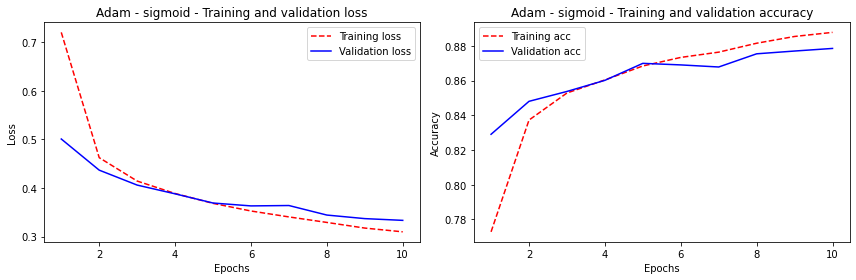

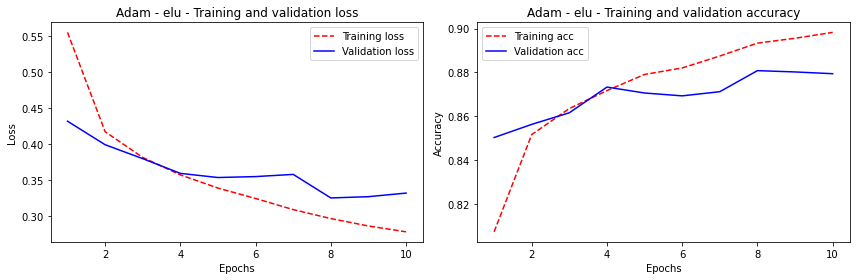

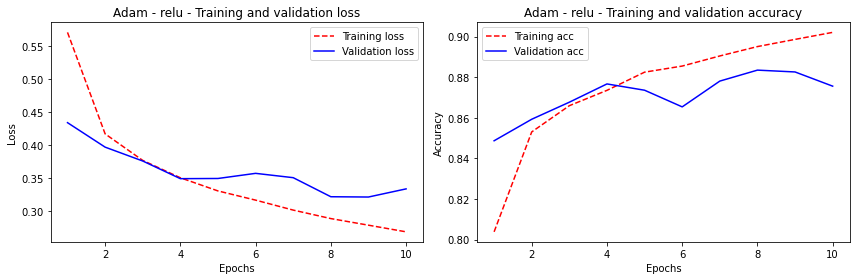

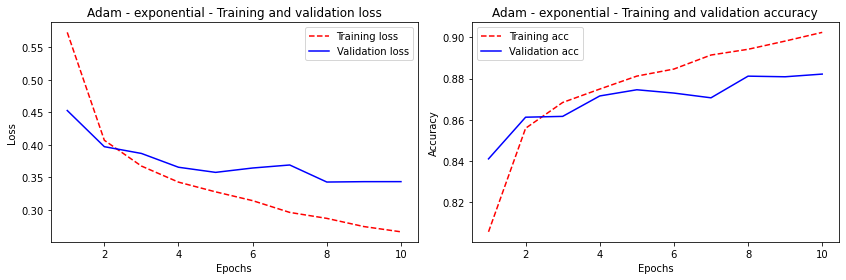

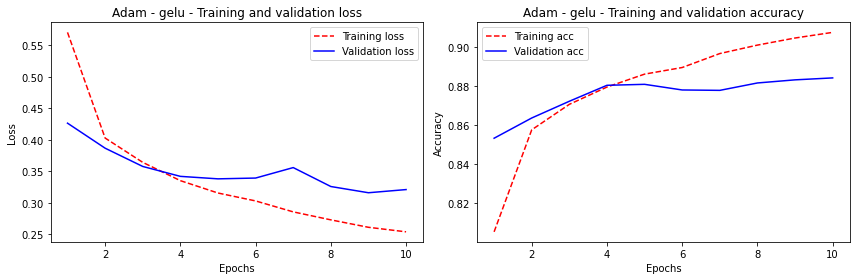

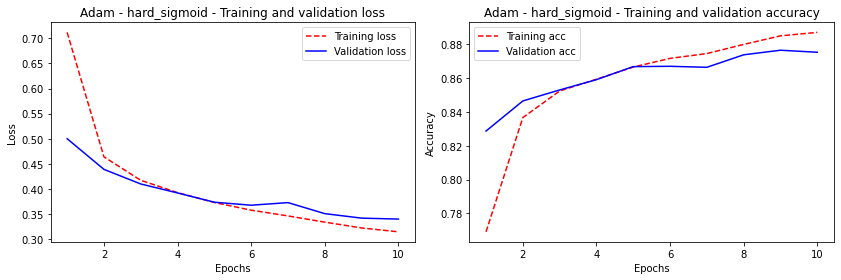

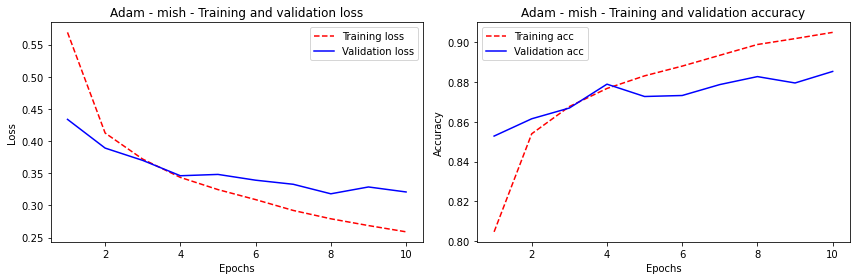

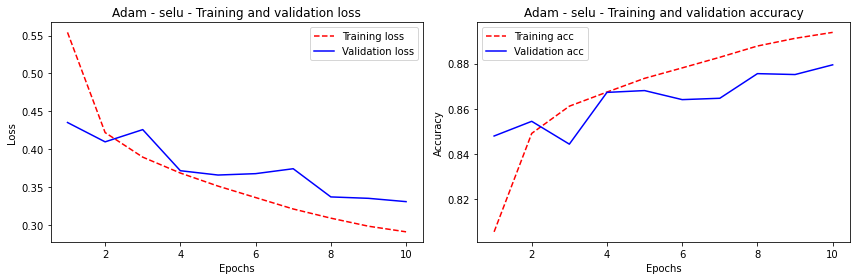

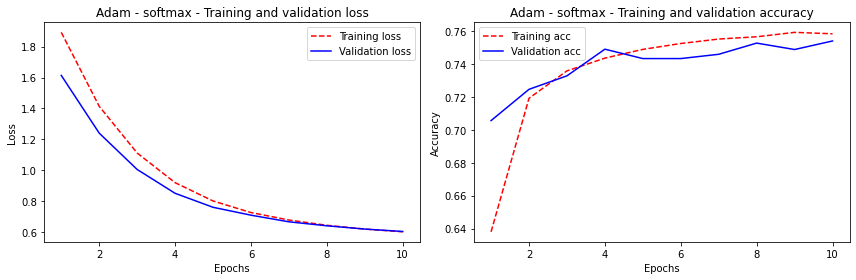

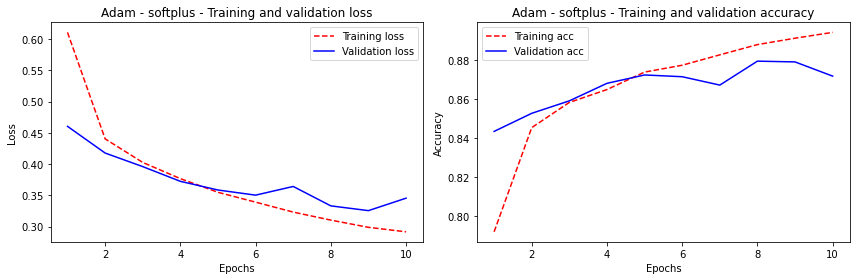

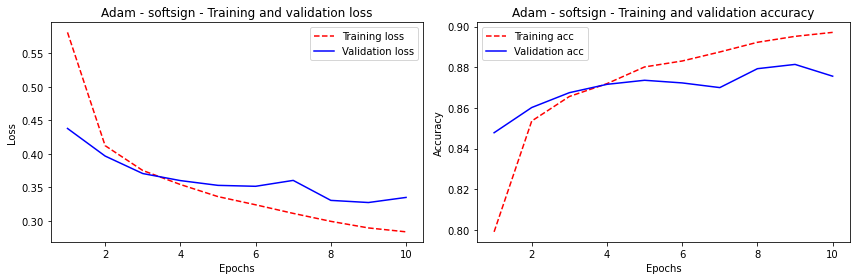

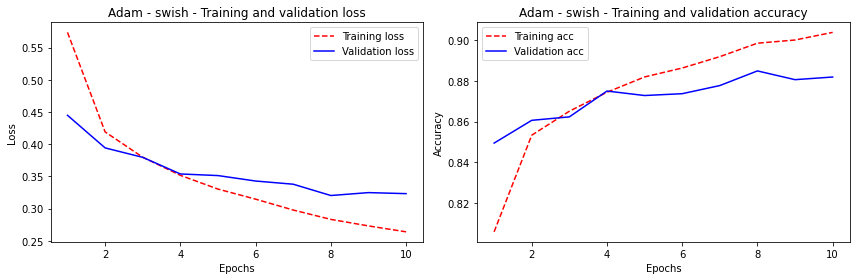

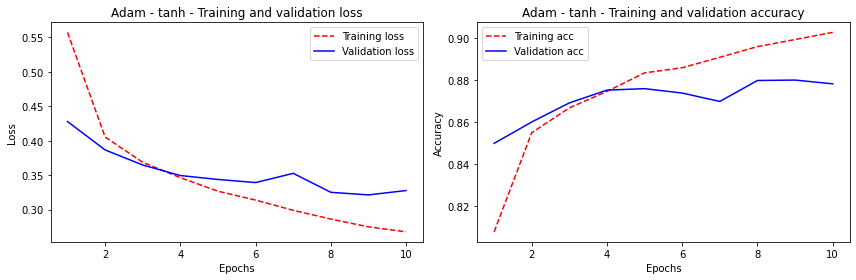

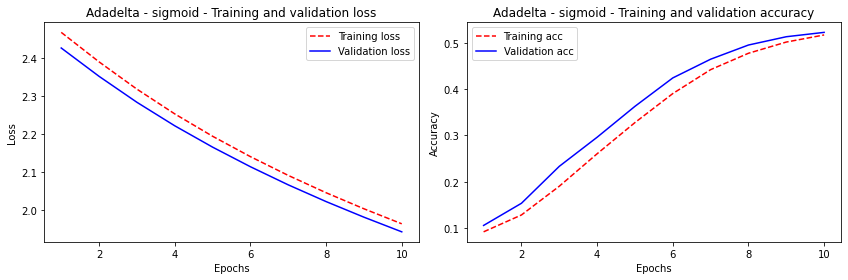

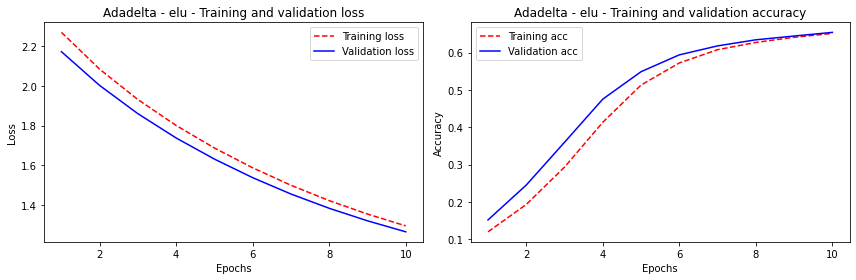

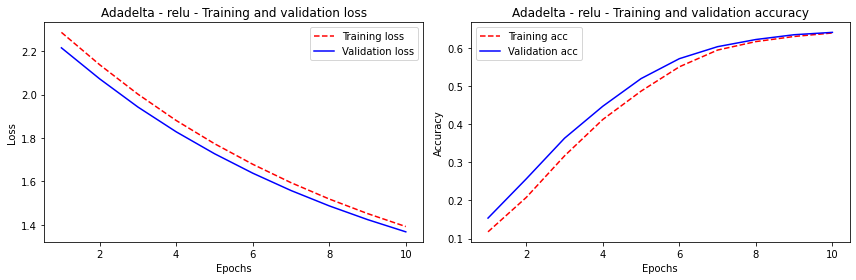

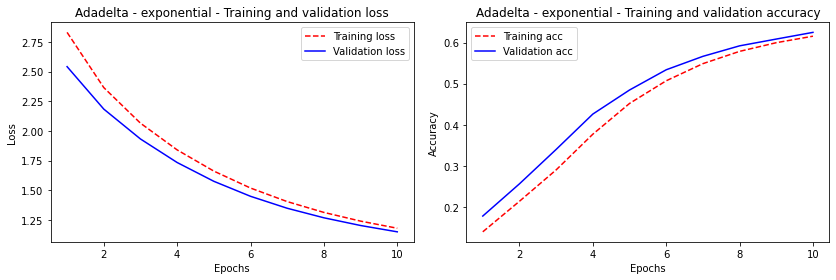

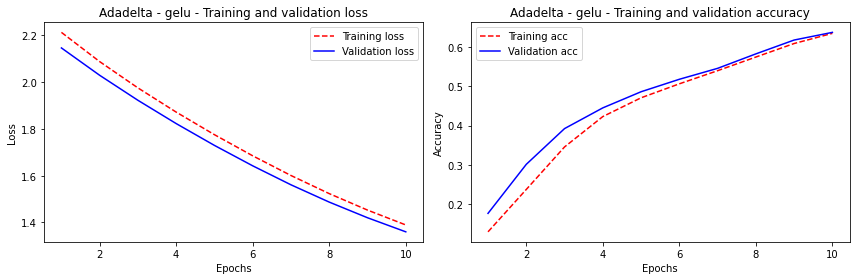

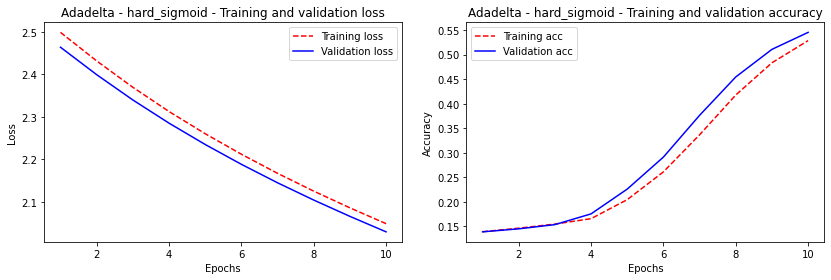

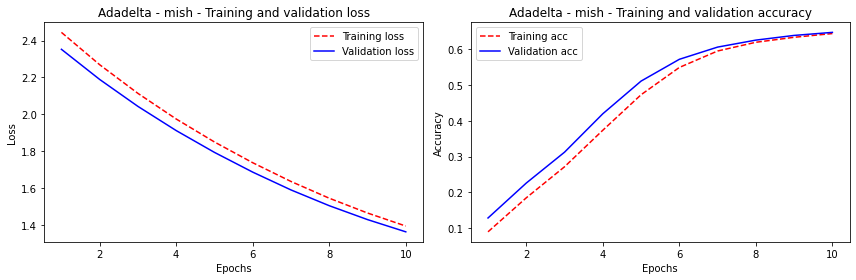

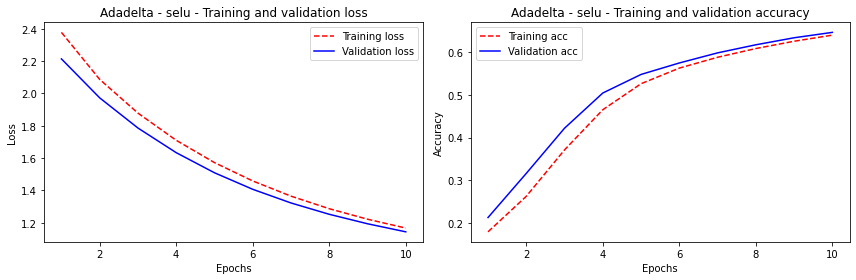

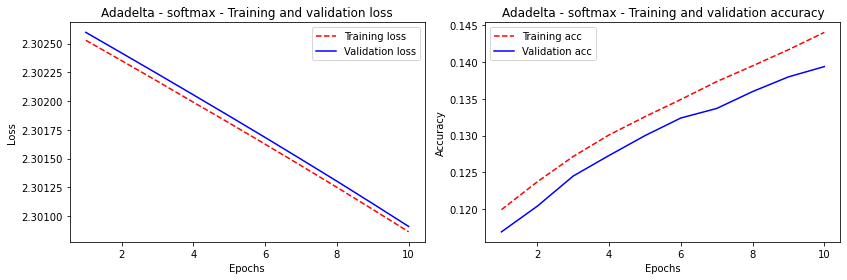

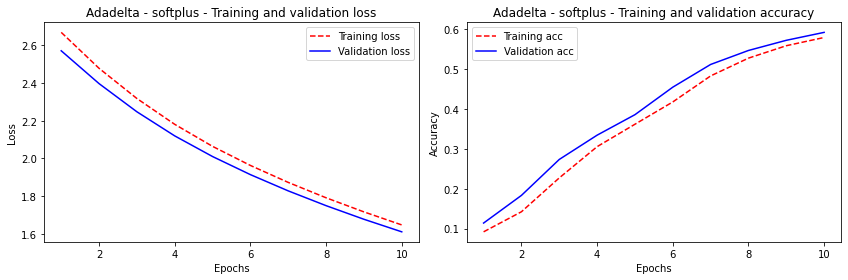

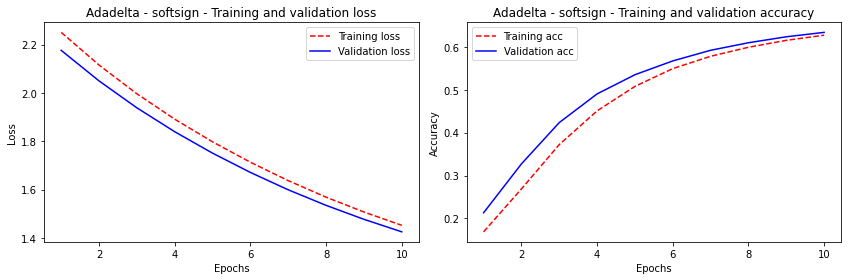

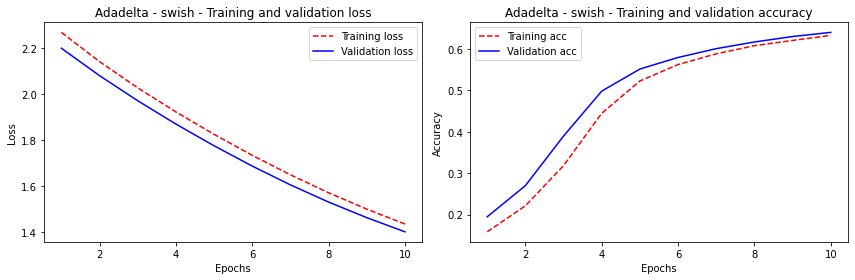

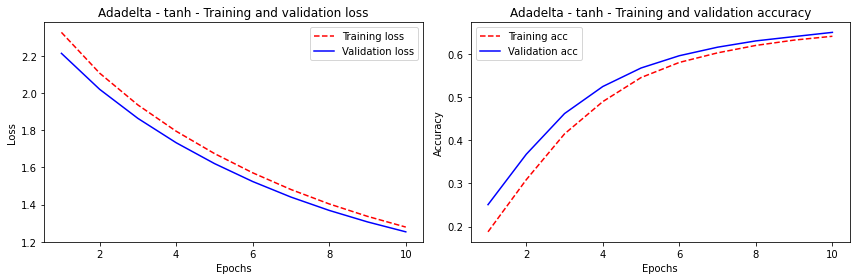

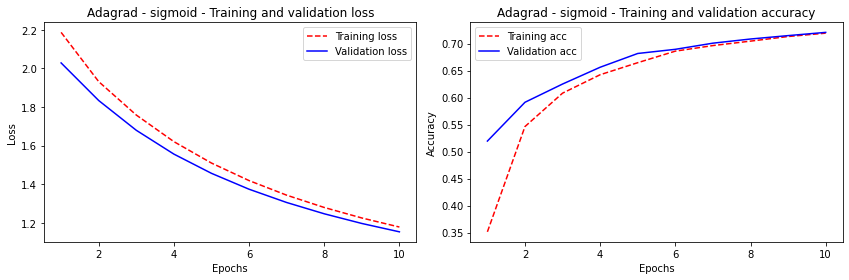

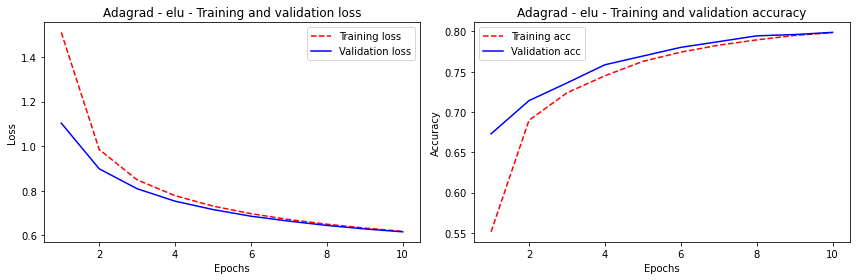

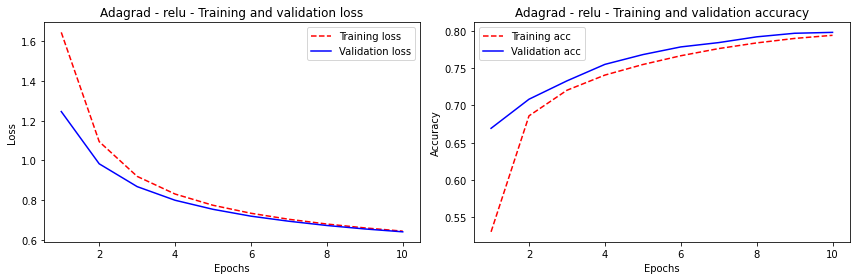

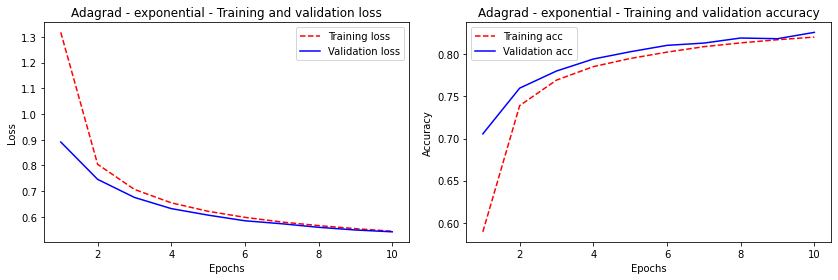

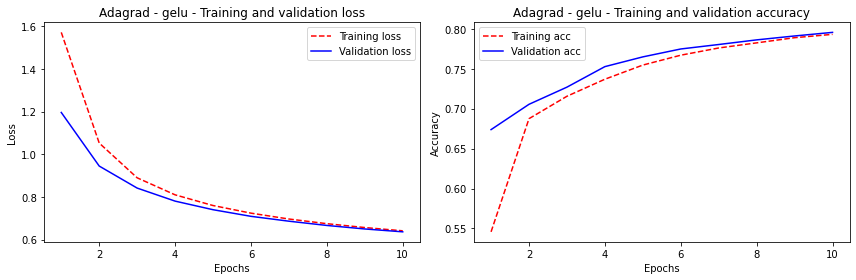

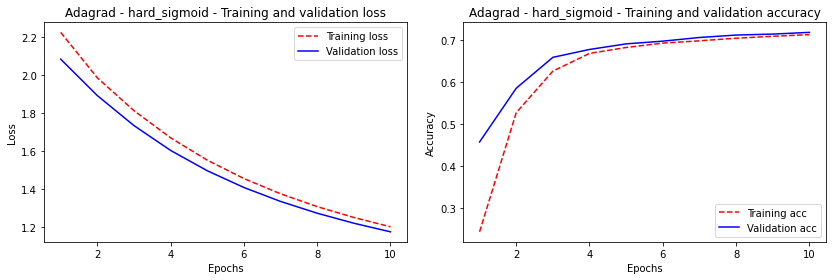

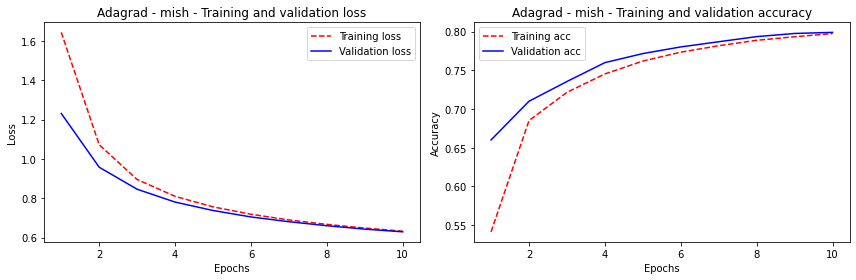

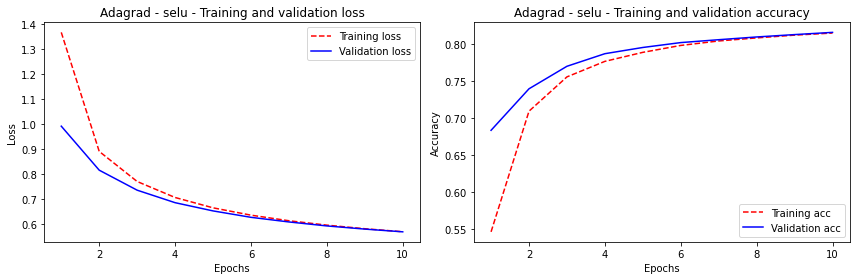

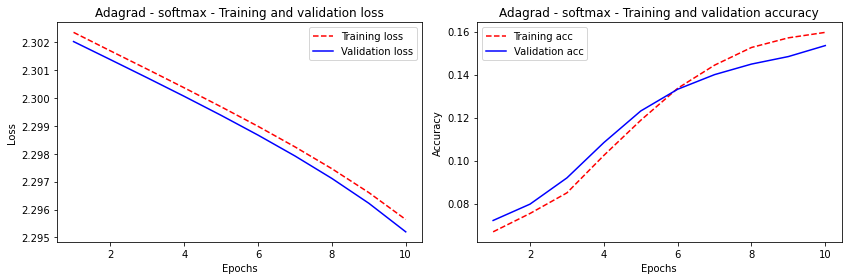

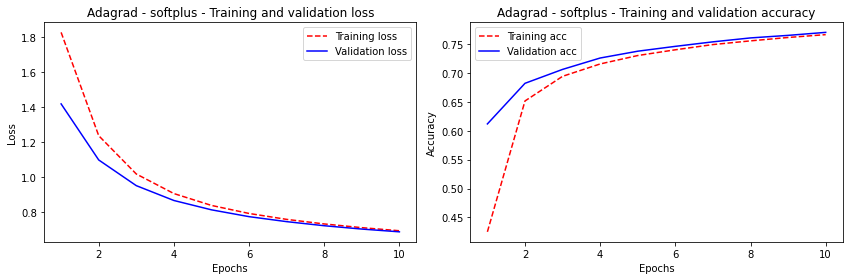

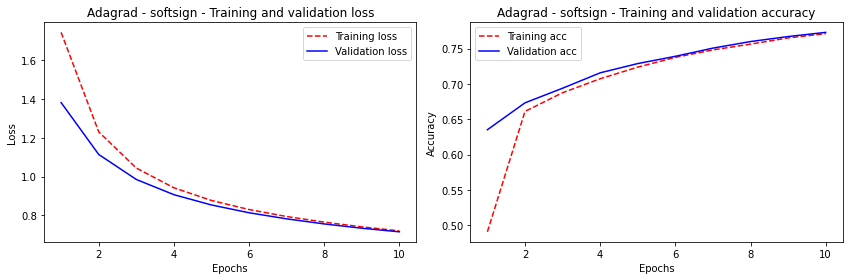

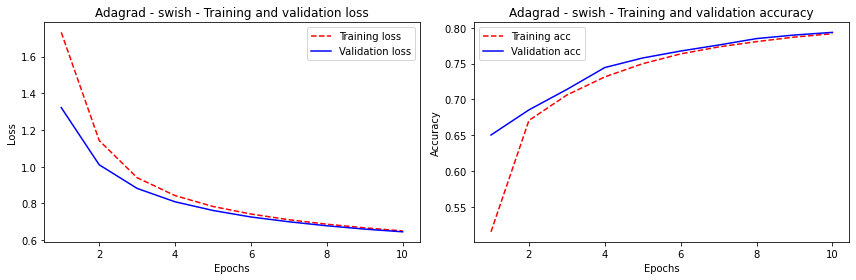

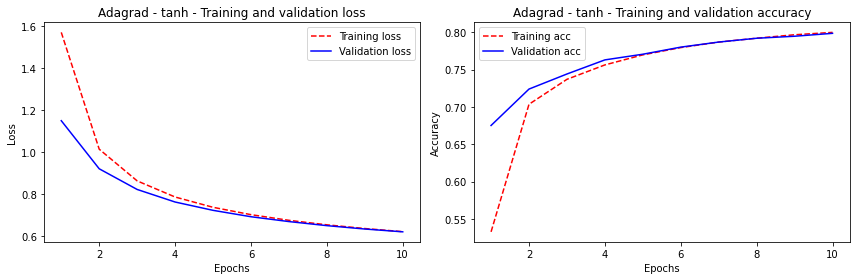

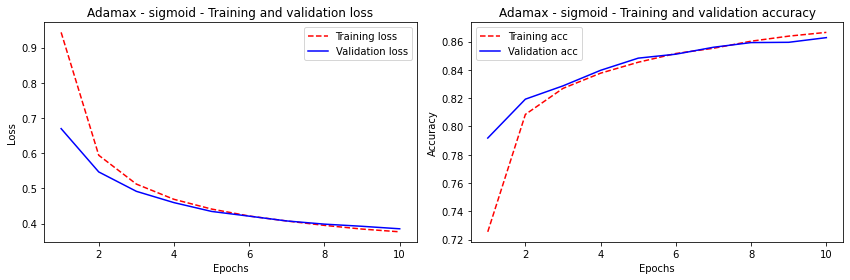

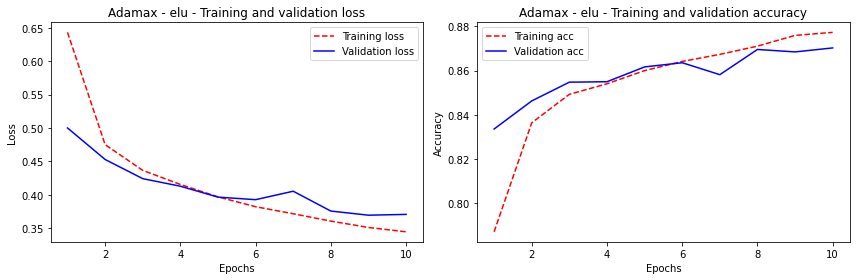

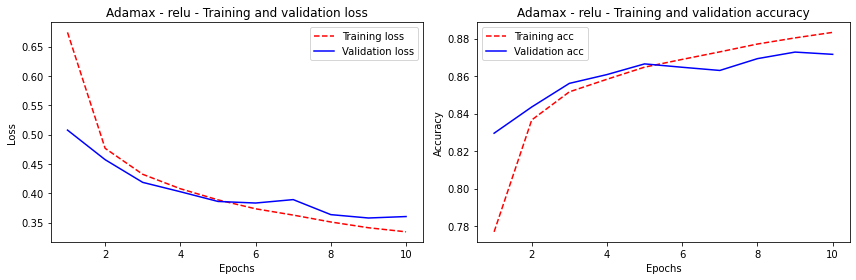

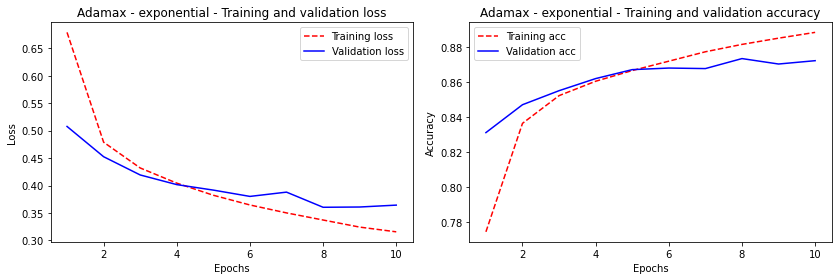

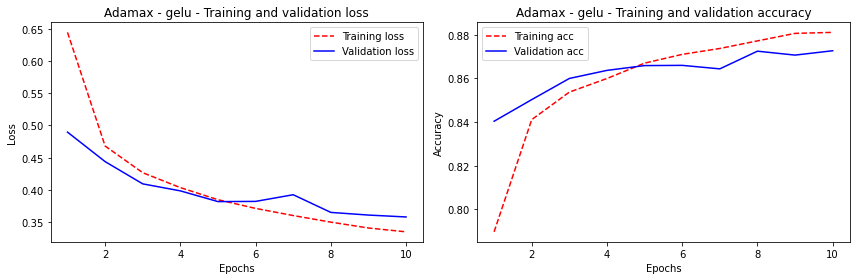

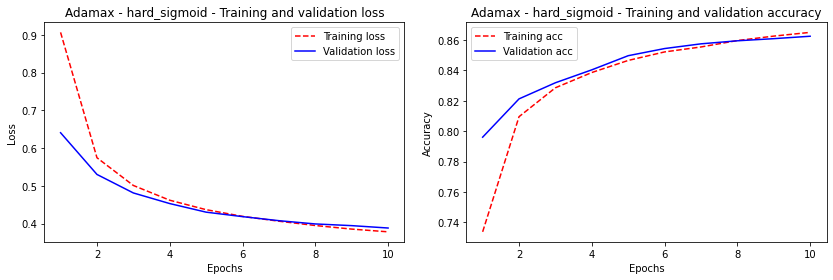

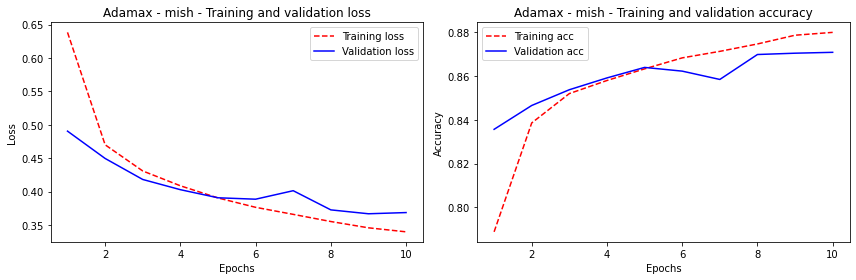

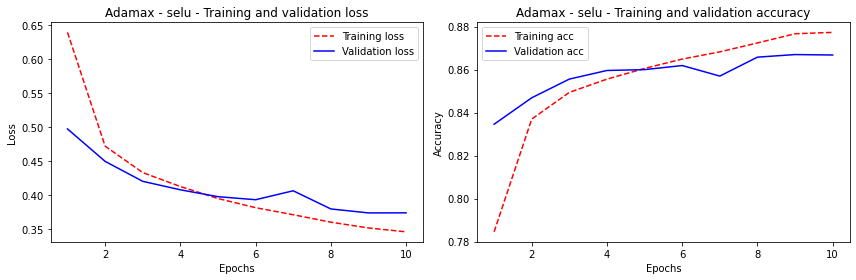

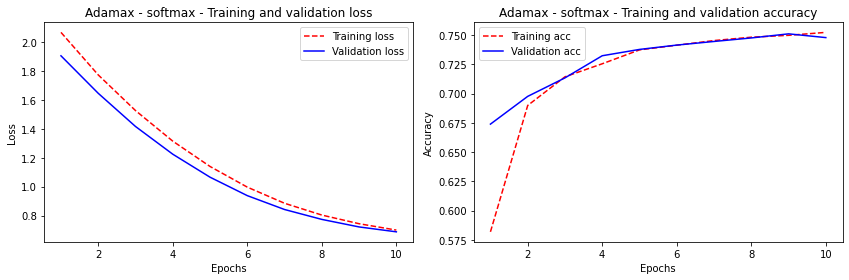

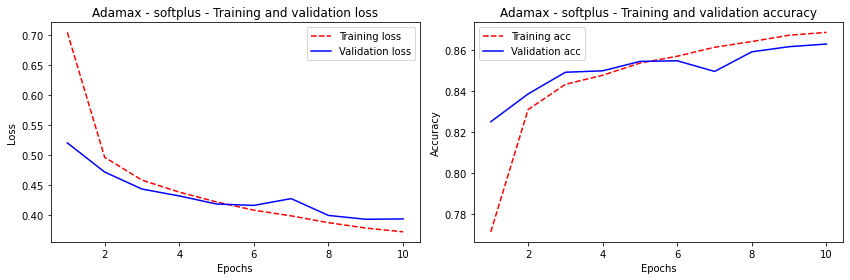

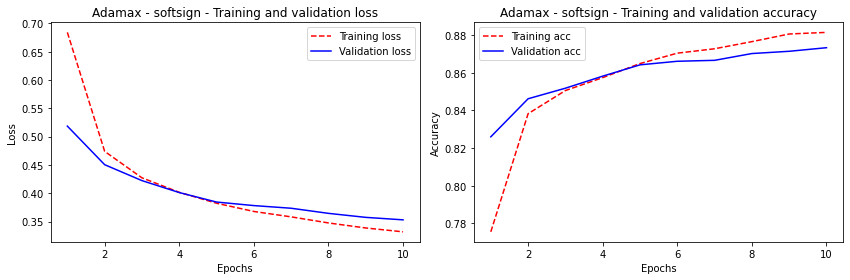

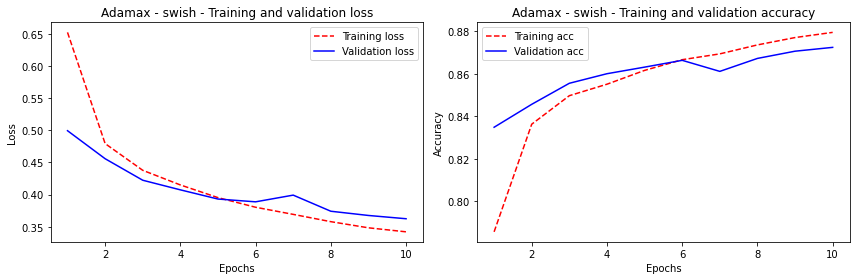

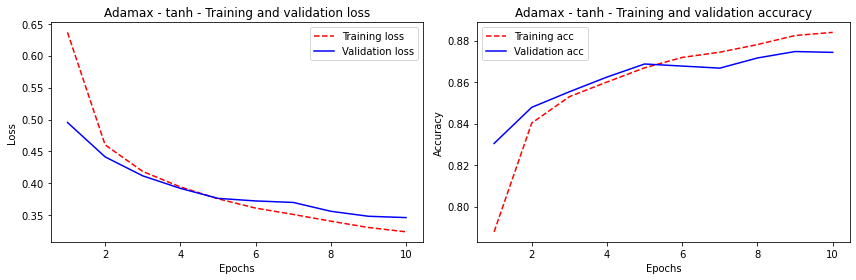

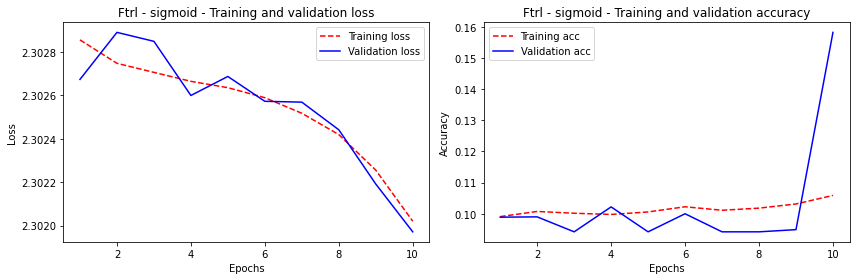

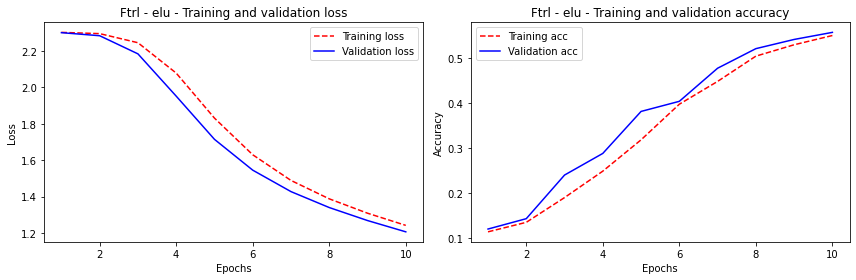

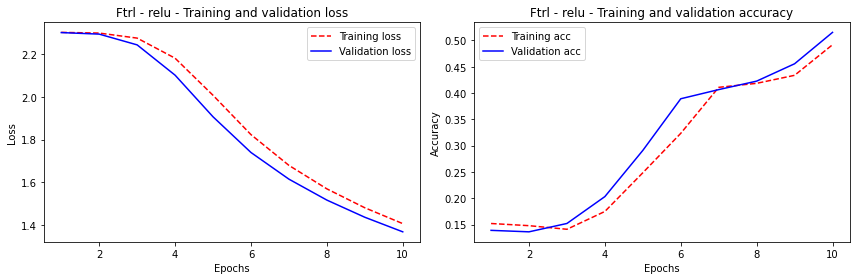

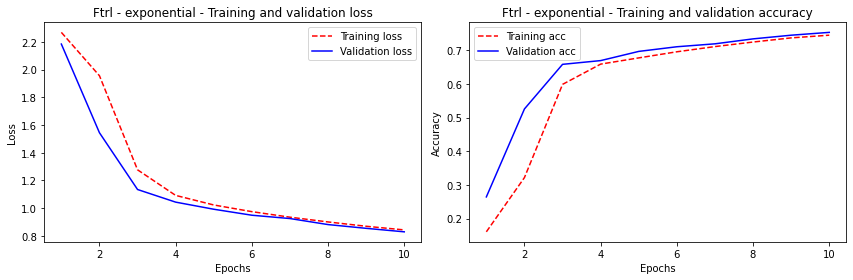

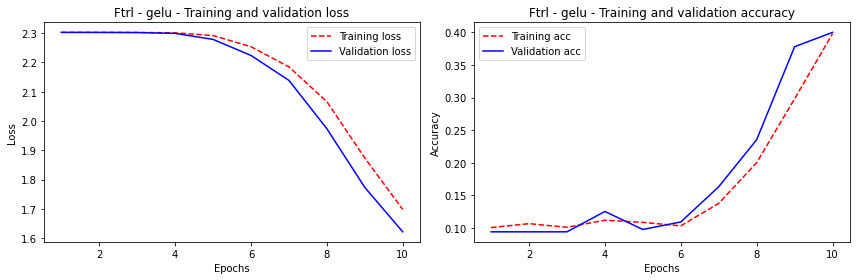

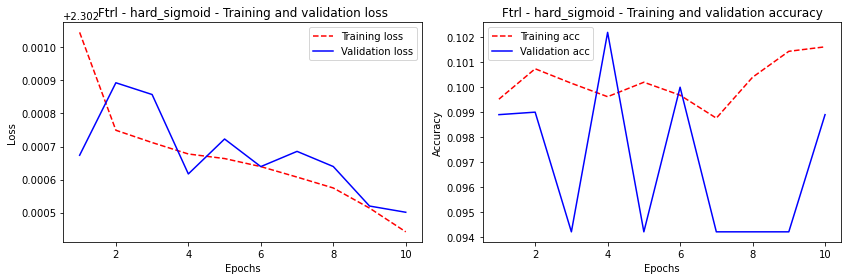

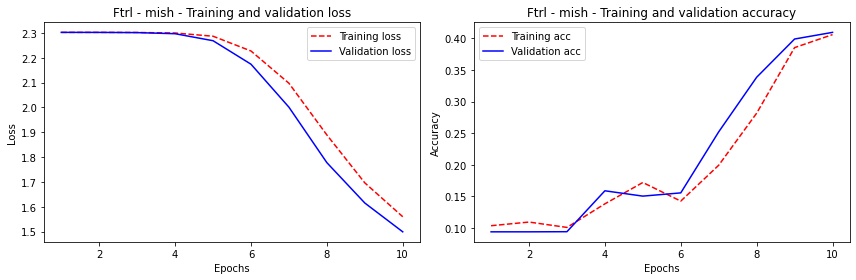

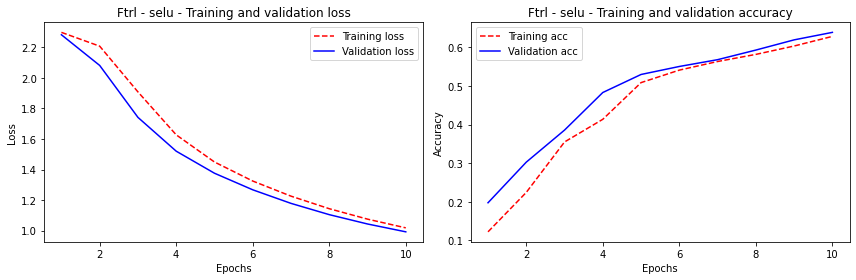

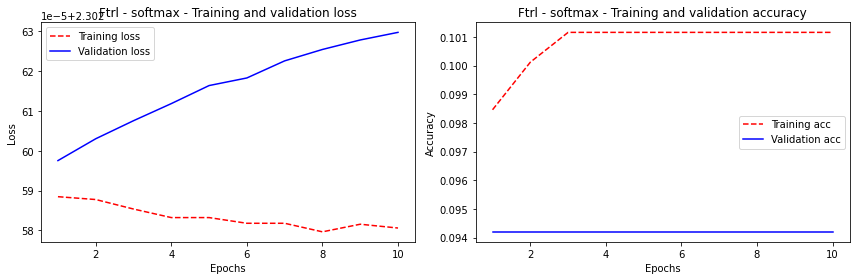

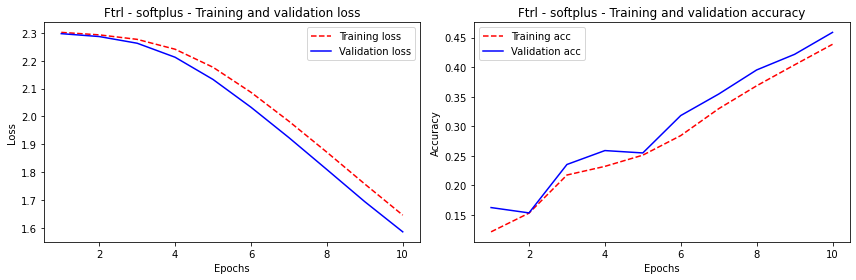

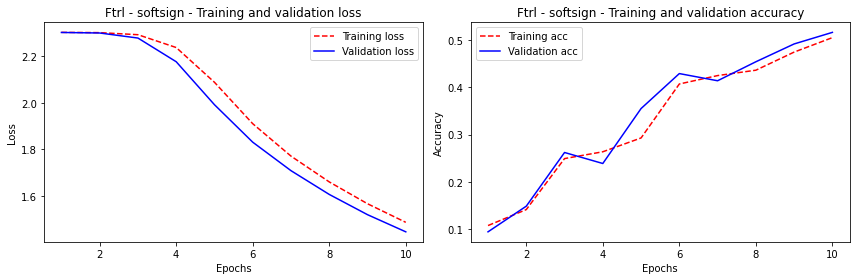

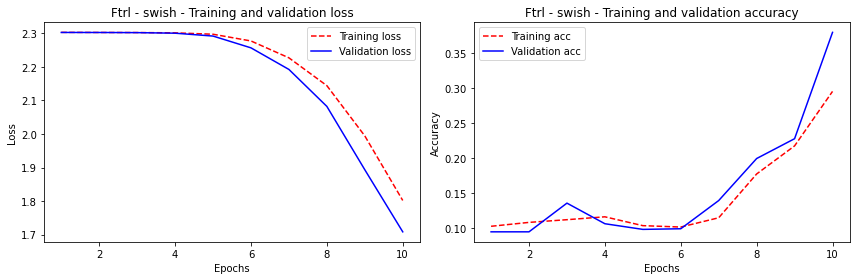

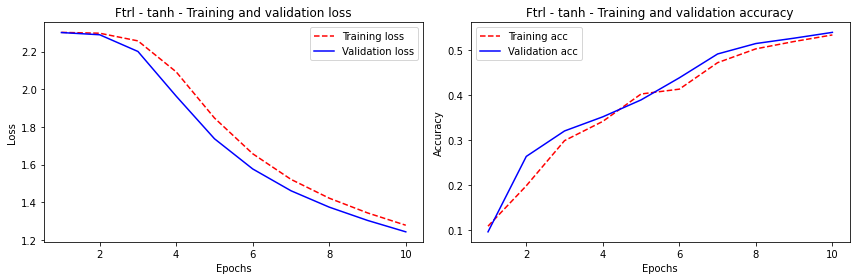

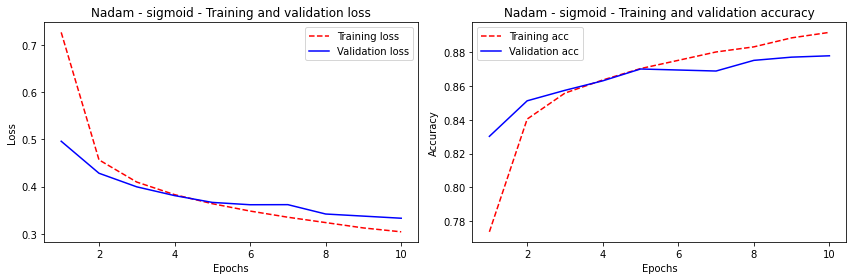

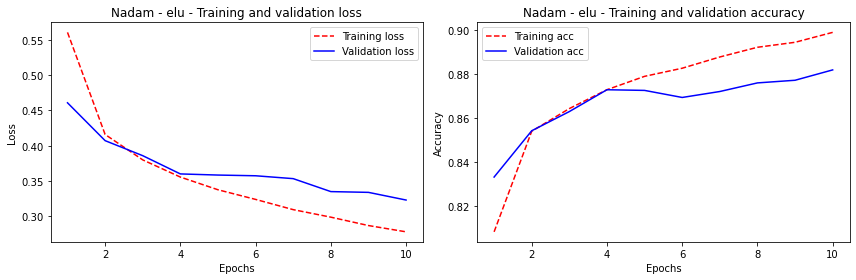

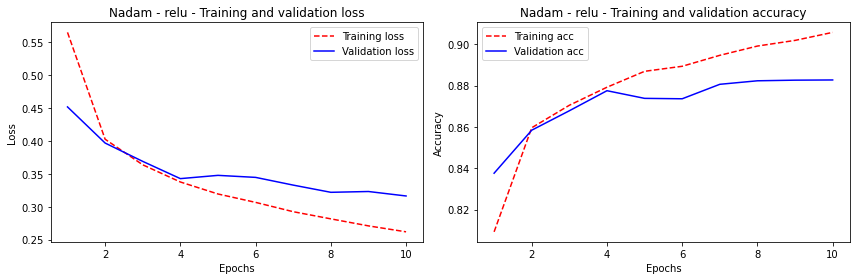

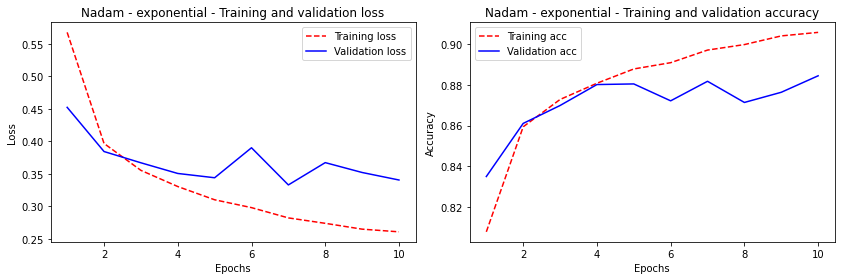

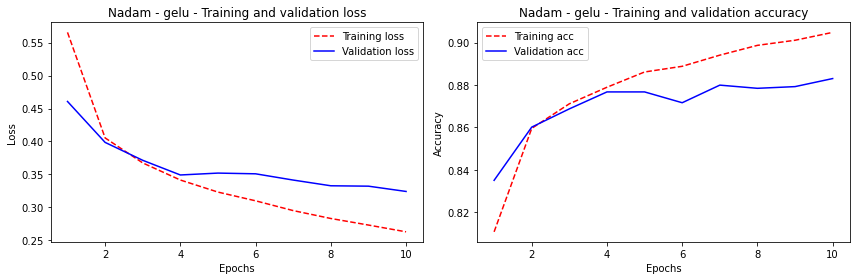

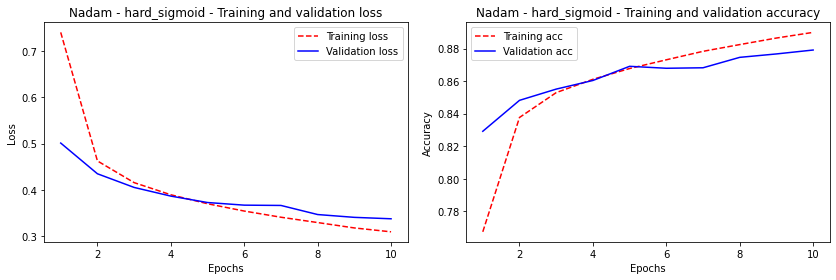

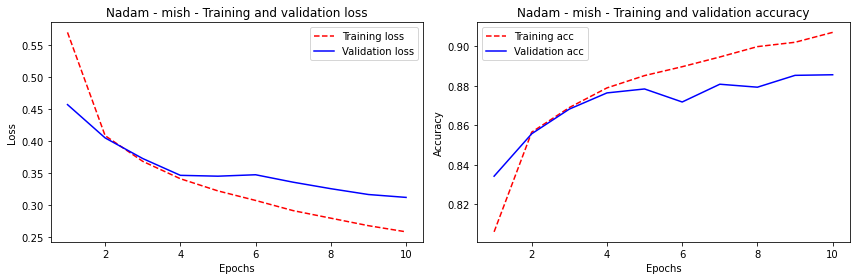

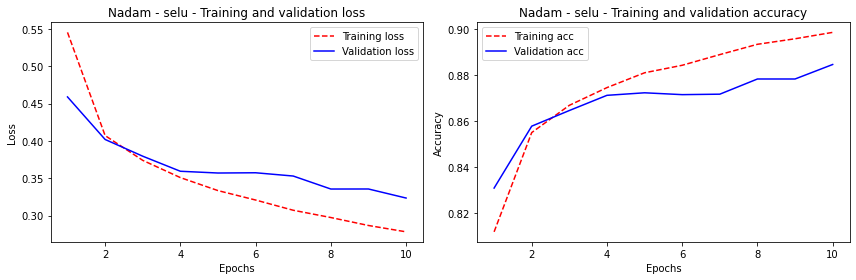

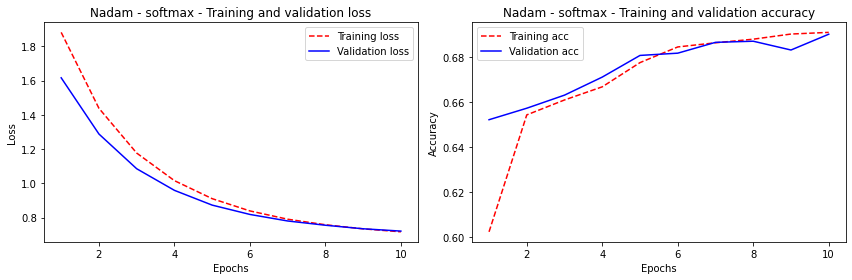

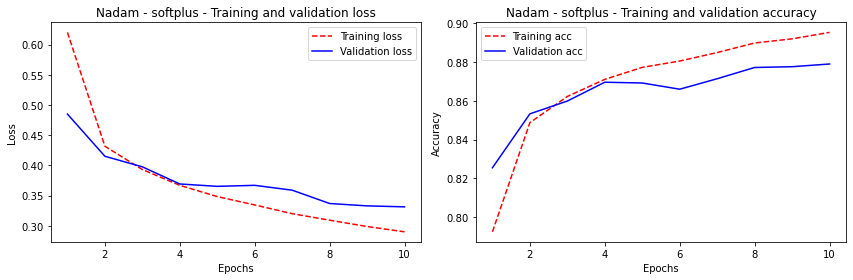

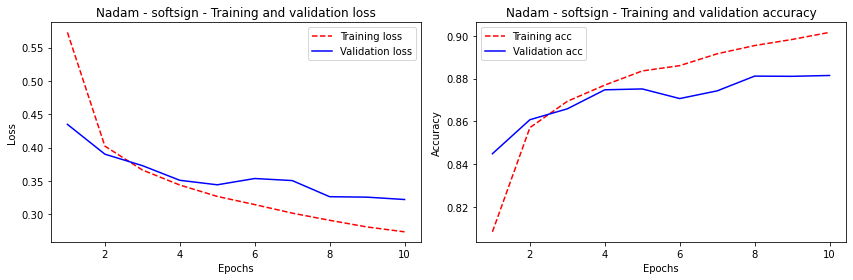

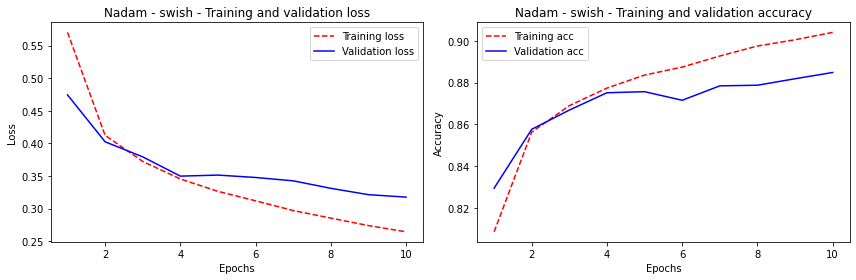

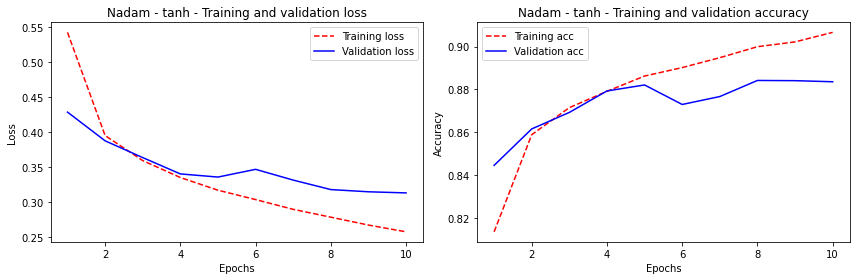

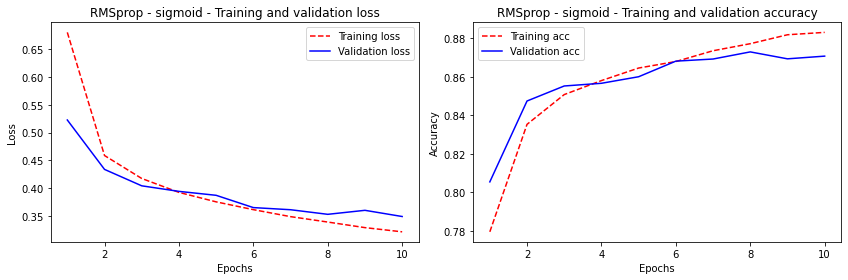

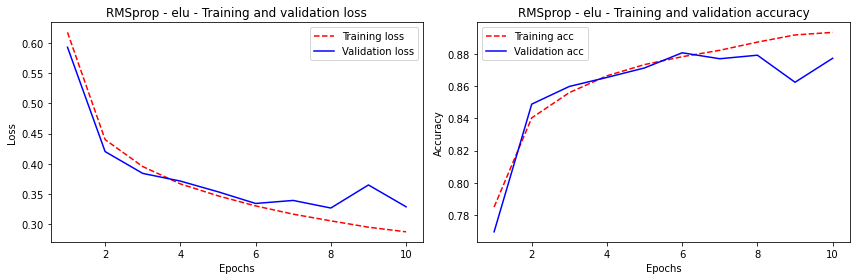

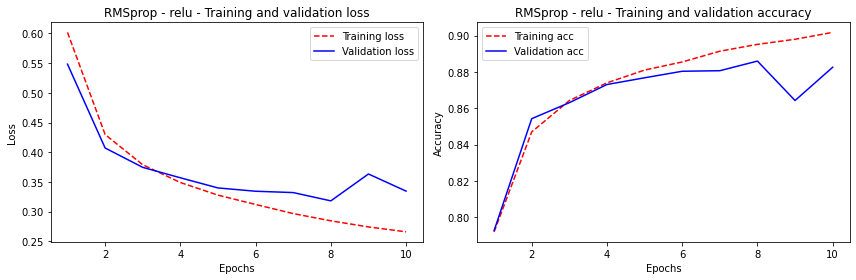

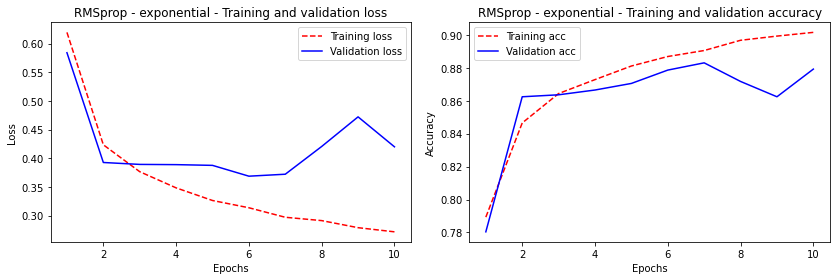

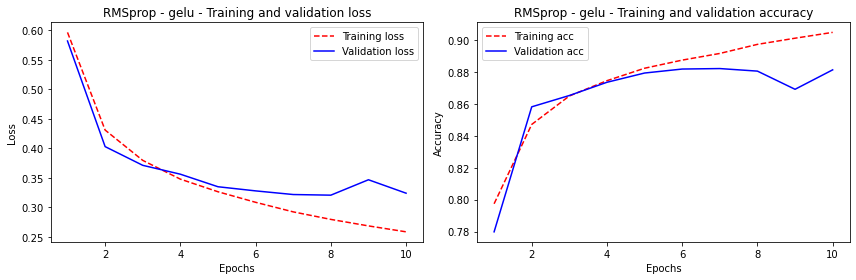

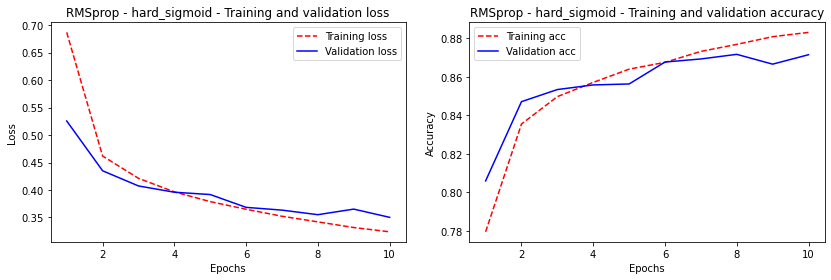

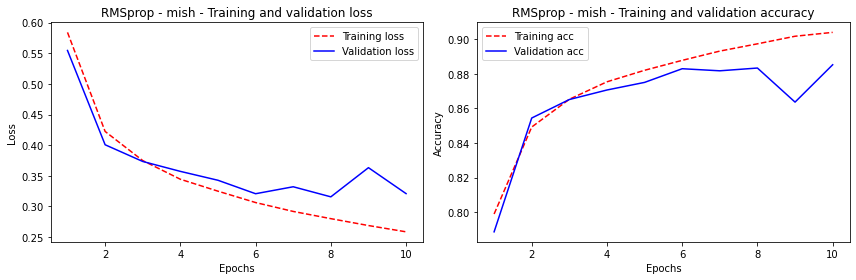

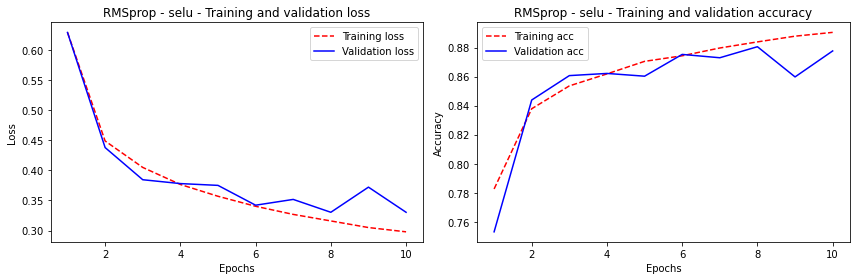

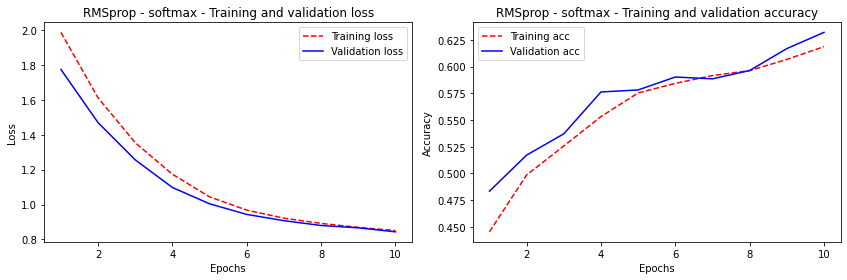

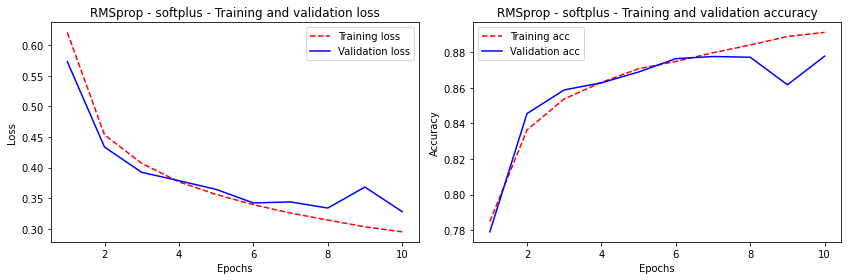

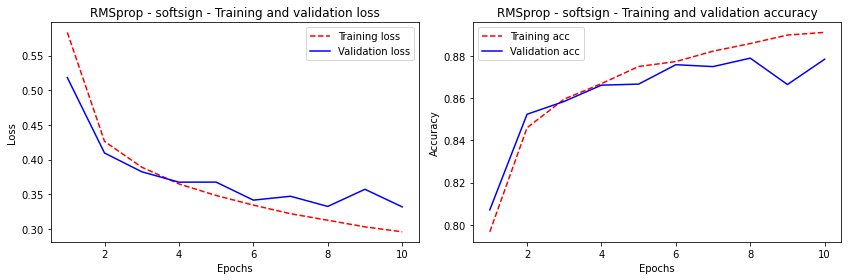

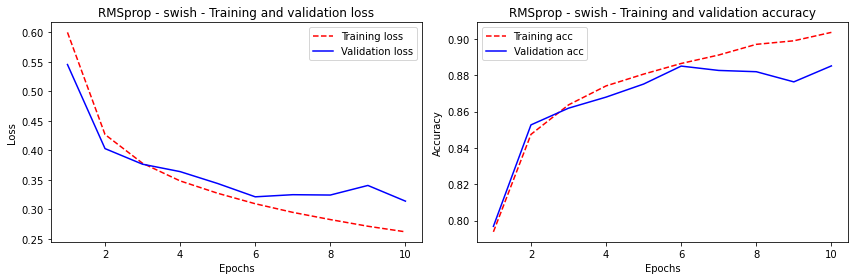

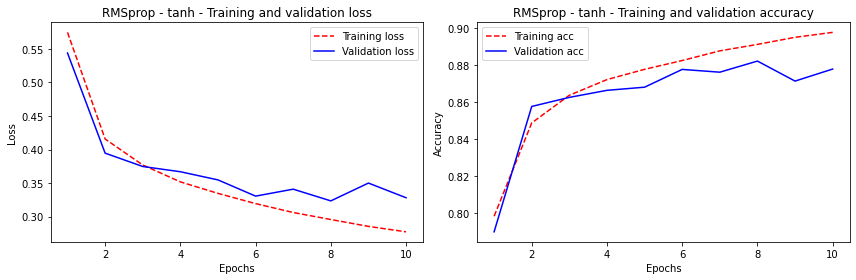

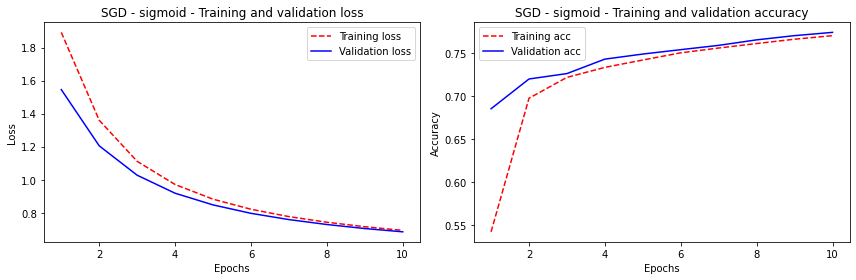

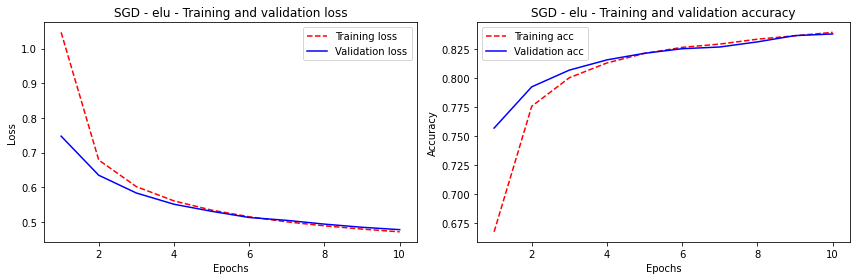

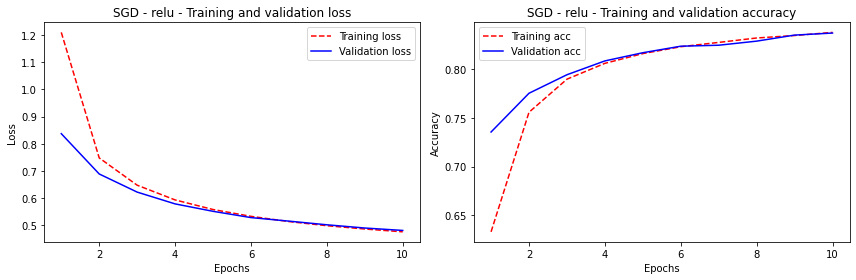

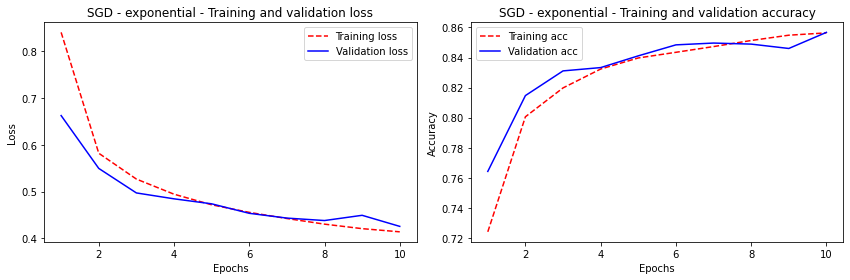

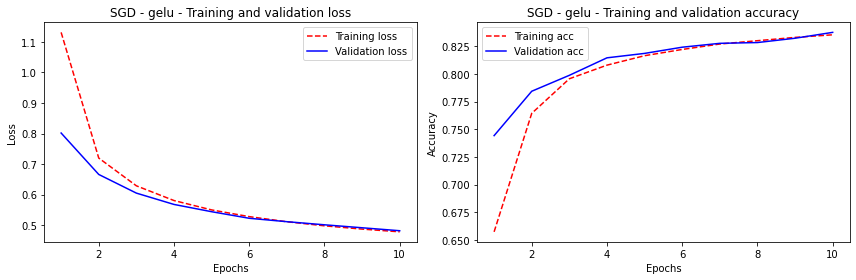

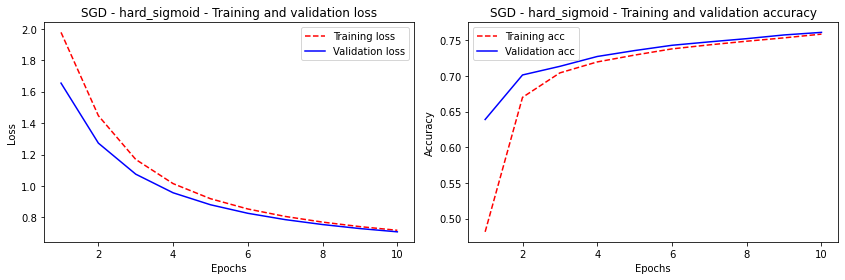

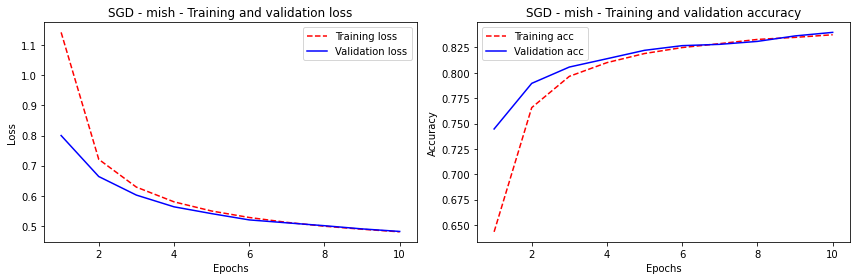

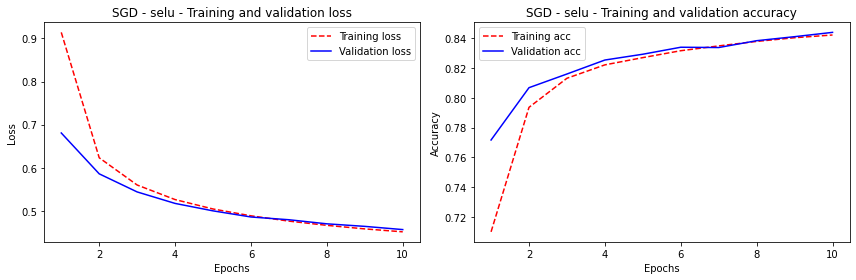

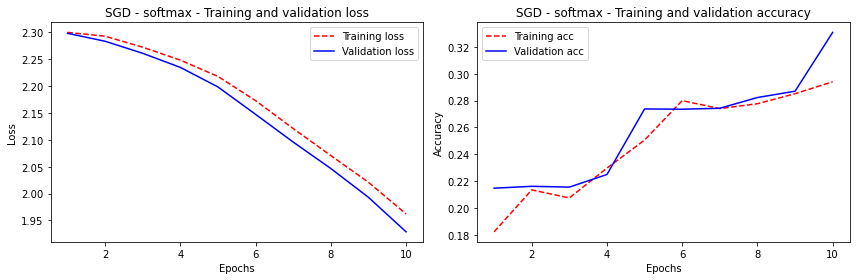

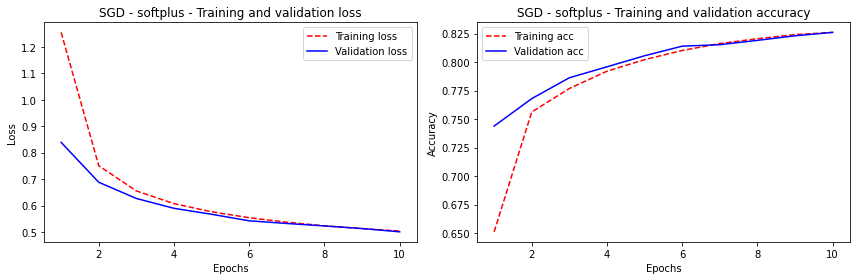

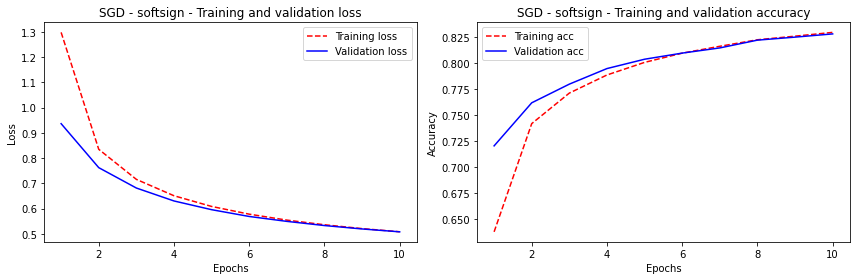

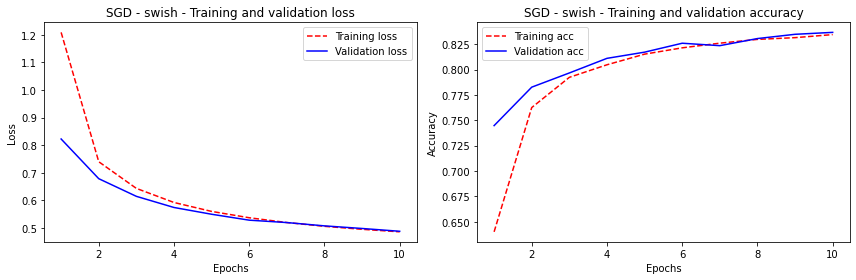

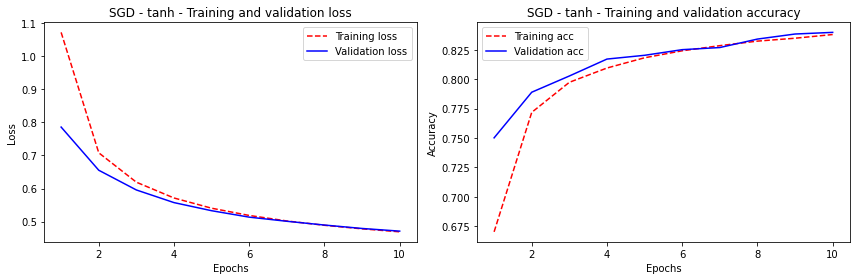

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# Define the list of optimizers
optimizers = ['Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']

# Define the list of activation functions
activation_functions = ['sigmoid', 'elu', 'relu', 'exponential', 'gelu', 'hard_sigmoid', 'mish', 'selu', 'softmax',
                       'softplus', 'softsign', 'swish', 'tanh']

# Create a list to store the evaluation results
results = []

for optimizer in optimizers:
    for activation in activation_functions:
        def build_model(clear=True):
            if clear:
                tf.keras.backend.clear_session()
            model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28, 28)),
                tf.keras.layers.Dense(128, activation=activation),
                tf.keras.layers.Dense(10)
            ])
            model.compile(optimizer=optimizer,
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=['accuracy'])
            return model

        model = build_model()

        history = model.fit(
            partial_x_train,
            partial_y_train,
            epochs=10,
            batch_size=128,
            validation_data=(x_val, y_val),
            verbose=0
        )
        history_dict = history.history

        # Extract values from the history dictionary
        val_loss = history_dict['val_loss'][-1]
        val_accuracy = history_dict['val_accuracy'][-1]

        # Plot the loss
        epochs = range(1, len(history_dict['loss']) + 1)
        loss = history_dict['loss']
        val_loss = history_dict['val_loss']
        acc = history_dict['accuracy']
        val_acc = history_dict['val_accuracy']

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, 'r--', label="Training loss")
        plt.plot(epochs, val_loss, 'b', label="Validation loss")
        plt.title(f"{optimizer} - {activation} - Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()

        # Plot the accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, acc, 'r--', label="Training acc")
        plt.plot(epochs, val_acc, 'b', label="Validation acc")
        plt.title(f"{optimizer} - {activation} - Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.tight_layout()
        plt.show()

        results.append((optimizer, activation, np.mean(val_loss), val_accuracy))

# Create a DataFrame to store the results
df = pd.DataFrame(results, columns=["Optimizer", "Activation", "Val Loss", "Val Accuracy"])


In [34]:
# save as csv in our machine
df.to_csv("results.csv", index=False)

In the next two tables, we can see the best and worst combination of the optimizer and activation function with respect to the validation accuracy.

In [48]:
df.sort_values('Val Accuracy', ascending=False).reset_index().head(10)

index Optimizer   Activation  Val Loss  Val Accuracy
0     71     Nadam         mish  0.356116        0.8856
1      6      Adam         mish  0.352619        0.8853
2     89   RMSprop        swish  0.365655        0.8852
3     84   RMSprop         mish  0.368191        0.8852
4     76     Nadam        swish  0.361706        0.8848
5     72     Nadam         selu  0.366115        0.8846
6     68     Nadam  exponential  0.368069        0.8845
7      4      Adam         gelu  0.350953        0.8843
8     77     Nadam         tanh  0.347824        0.8836
9     69     Nadam         gelu  0.361271        0.8830

Among the top 5 combinations, the validation accuracy is somehow the same. While training, there may be occasional drops in validation accuracy in certain epochs, but it eventually improves.

In [49]:
df.sort_values('Val Accuracy', ascending=False).reset_index().tail(10)

index Optimizer    Activation  Val Loss  Val Accuracy
94      61      Ftrl      softplus  2.023831        0.4587
95      58      Ftrl          mish  2.054026        0.4092
96      56      Ftrl          gelu  2.121641        0.4000
97      63      Ftrl         swish  2.163237        0.3799
98      99       SGD       softmax  2.148812        0.3308
99      52      Ftrl       sigmoid  2.302545        0.1582
100     34   Adagrad       softmax  2.298867        0.1535
101     21  Adadelta       softmax  2.301768        0.1394
102     57      Ftrl  hard_sigmoid  2.302675        0.0989
103     60      Ftrl       softmax  2.302616        0.0942

Clearly, the worst combinations reveal low validation accuracy, but there are other crucial aspects to consider. We will point out some of them here and do not analyse all of them:

- `Ftrl-hardsigmoid`: The validation accuracy plot is fluctuating which makes our model not learn.
- `Ftrl-gelu`: The process of learning starts after epoch 6, which is late.
- `Ftrl-softMax`: The validation accuracy is still the same which causes underfitting and the model will not learn.
- `Ftrl-Expotential`:  Our validation accuracy is higher than the training, which will lead to overfitting.
- `Ftrl-swish`: Starts overfitting after epoch 9.
- `Adadelta-softmax`: Although there is no underfitting or overfitting the learning speed is low.
- `SGD-softmax`: The accuracy is low, and keeps constant between some epochs.

In the winning combinations:
- `Nadam-mish`: The accuracy drops in some epochs but starts to improve again.
- Between `RMSprop-swish` and `RMSprop-mish` we can see that `RMSprop-mish` is showing more progression overall, although a big drop happened in the ending epochs.
- Between `Nadam` winning combinations, `Nadam-exponential` show more fluctuation from the 4 epoch.

There might be other combinations which lead to overfitting that are not noticed in the losing or winning combination such as:
- `RMSprop-Softmax` in which our validation accuracy is always higher than training (overfitts).

As predicted the `FTRL` is not a proper optimizer for our data, `Softmax` seems to not be in any of the winning combinations either. Although The combination of the `Adam-Softmax` validation accuracy curve does not show any awkward behaviour, It does not achieve a high accuracy.

In our forthcoming experiments, we will use the `Nadam` optimizer and the `mish` activation function as this combination increased the validation accuracy to 88.56% which is somehow 0.50% more than the previous one.

# 4. Adjusting the Number of Neurons in the Hidden Layer

Tensorflow suggests 128 neurons for our hidden layer. As 128 is 2 raised to the power of 7, we will explore a range from 2^4 to 2^8 for the number of neurons. Choosing this number for the hidden layer is my personal choice and the earlier description is not a logical explanation for it.

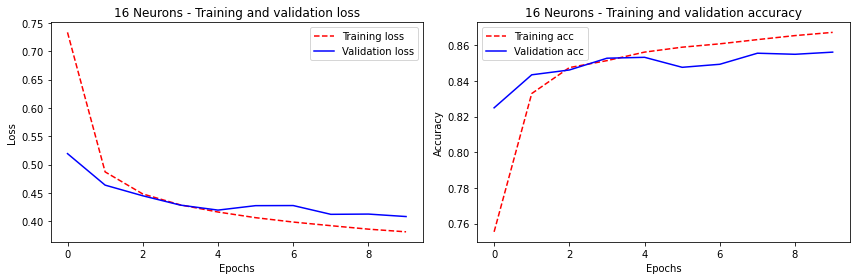

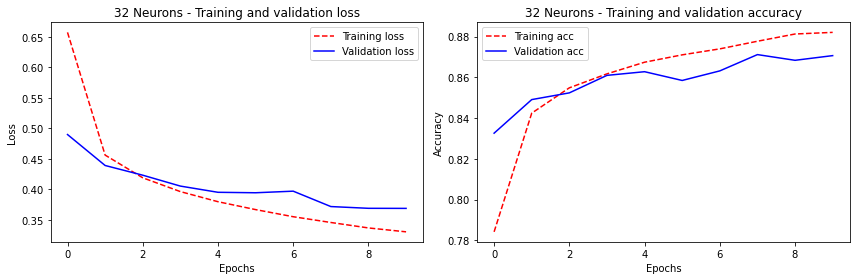

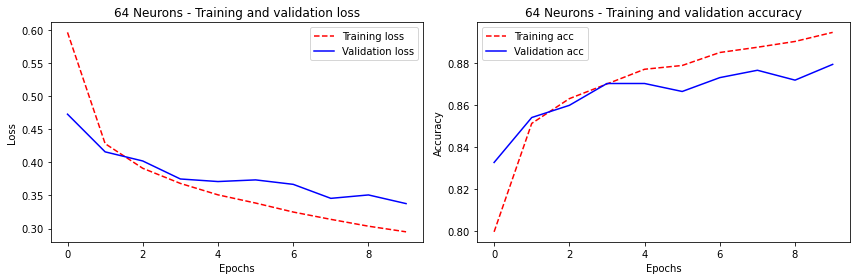

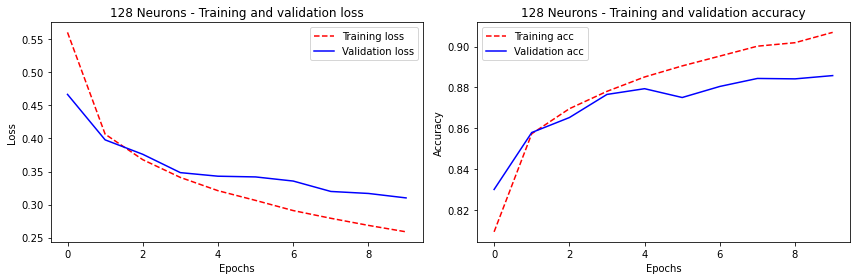

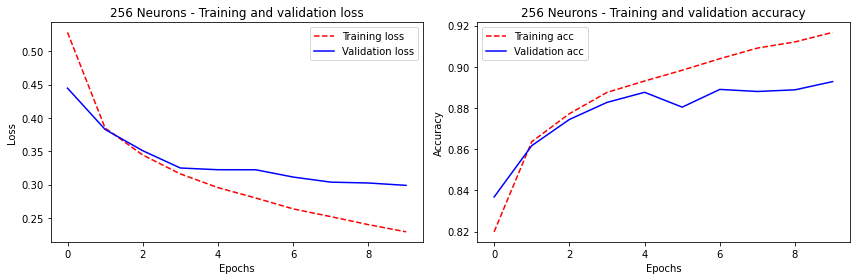

In [50]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

layer_dense = [16, 32, 64, 128, 256]

# Create a list to store the evaluation results
results = []

for layer_neurons in layer_dense:
    def build_model(clear=True):
        if clear:
            tf.keras.backend.clear_session()
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(layer_neurons, activation='mish'),
            tf.keras.layers.Dense(10)
        ])
        model.compile(optimizer='Nadam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
        return model

    model = build_model()

    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0
    )
    
    # Get the validation loss and accuracy from the history object
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    results.append((layer_neurons, val_loss, val_accuracy))

    # Plot the loss and accuracy (same as before)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r--', label="Training loss")
    plt.plot(history.history['val_loss'], 'b', label="Validation loss")
    plt.title(f"{layer_neurons} Neurons - Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'r--', label="Training acc")
    plt.plot(history.history['val_accuracy'], 'b', label="Validation acc")
    plt.title(f"{layer_neurons} Neurons - Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a DataFrame to store the results
df_2 = pd.DataFrame(results, columns=["Layer Neurons", "Val Loss", "Val Accuracy"])


We can observe that a layer with 256 neurons yields the highest accuracy. The difference between 128 and 256 neurons is significantly smaller than the difference between a 32-neuron layer and a 64-neuron layer.

In [52]:
df_2.sort_values('Val Accuracy', ascending=False).reset_index()

index  Layer Neurons  Val Loss  Val Accuracy
0      4            256  0.298835        0.8928
1      3            128  0.310050        0.8858
2      2             64  0.337712        0.8795
3      1             32  0.368622        0.8707
4      0             16  0.408640        0.8561

The validation accuracy reaches 89.28% by adding a hidden layer with 256 neurons which is 0.72% more than the pervious section.

# 5. Introducing an Additional Hidden Layer

We will add an extra hidden layer into our model. The number of neurons and activation function in this new layer will be consistent with the previous section.

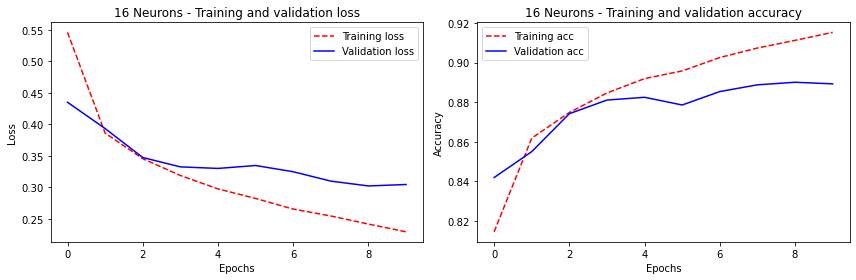

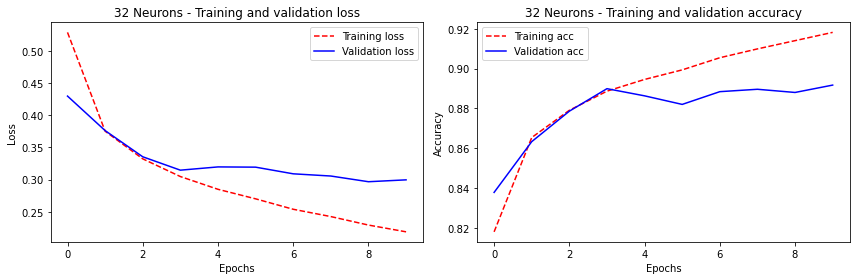

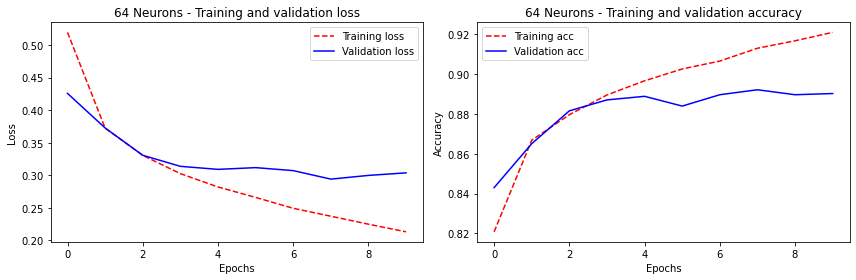

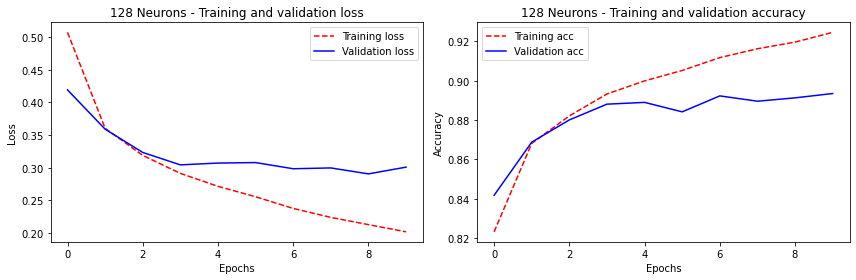

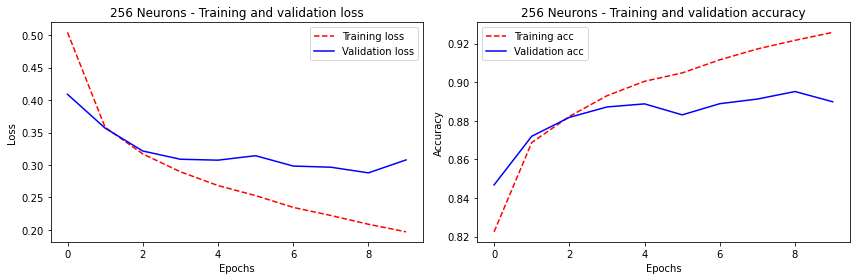

In [53]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

layer_dense = [16, 32, 64, 128, 256]

# Create a list to store the evaluation results
results = []

for layer_neurons in layer_dense:
    def build_model(clear=True):
        if clear:
            tf.keras.backend.clear_session()
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='mish'),
            tf.keras.layers.Dense(layer_neurons, activation='mish'),
            tf.keras.layers.Dense(10)
        ])
        model.compile(optimizer='Nadam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
        return model

    model = build_model()

    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0
    )

    # Get the validation loss and accuracy from the history object
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    results.append((layer_neurons, val_loss, val_accuracy))

    # Plot the loss and accuracy (same as before)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r--', label="Training loss")
    plt.plot(history.history['val_loss'], 'b', label="Validation loss")
    plt.title(f"{layer_neurons} Neurons - Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'r--', label="Training acc")
    plt.plot(history.history['val_accuracy'], 'b', label="Validation acc")
    plt.title(f"{layer_neurons} Neurons - Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a DataFrame to store the results
df_3 = pd.DataFrame(results, columns=["Layer Neurons", "Val Loss", "Val Accuracy"])

We can see that in this new layer, by adding more neurons we will not always get better accuracy. As a layer with 32 neurons is performing better than 64 or 256 one.
For the next sections we will use a 128 neurons layer for our second hidden layer.

In [54]:
df_3.sort_values('Val Accuracy', ascending=False).reset_index()

index  Layer Neurons  Val Loss  Val Accuracy
0      3            128  0.300941        0.8935
1      1             32  0.299707        0.8917
2      2             64  0.303697        0.8903
3      4            256  0.307772        0.8899
4      0             16  0.304358        0.8893

It is evident that increasing the number of neurons in this new layer does not always result in improved accuracy. Surprisingly, a 32-neuron layer outperforms both 64 and 256-neuron layers. As we proceed to the next sections, we will use a 128-neuron layer for our second hidden layer. We acquired 0.07% better accuracy by adding an extra layer with 128 neurons.

# 6. K-Fold Validation

In the following section, we will implement the K-fold validation method as described in the book and taught in our class for our model. The K is defined as 4, which was a random choice of mine.

processing fold 0
Fold 0 - Training Accuracy: 0.9211999773979187, Validation Accuracy: 0.8917999863624573
processing fold 1
Fold 1 - Training Accuracy: 0.9235333204269409, Validation Accuracy: 0.8965333104133606
processing fold 2
Fold 2 - Training Accuracy: 0.9228666424751282, Validation Accuracy: 0.8941333293914795
processing fold 3
Fold 3 - Training Accuracy: 0.9252889156341553, Validation Accuracy: 0.8870000243186951
Average Training Accuracy: 0.9232222139835358, Average Validation Accuracy: 0.8923666626214981


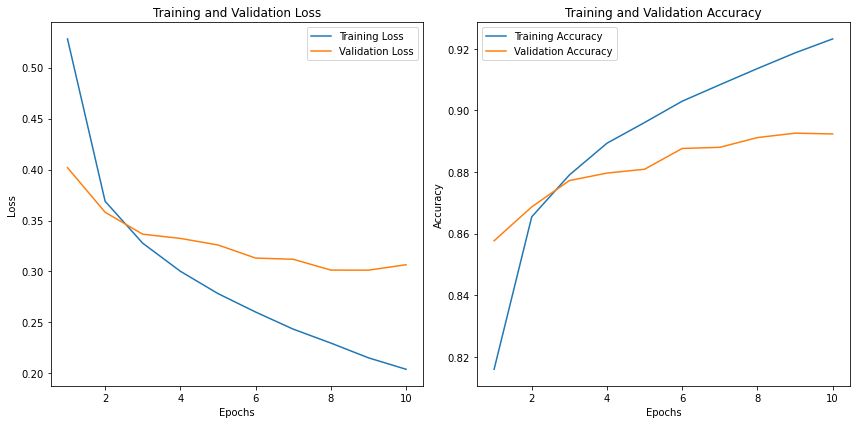

In [64]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Create lists to store the evaluation results
results = []

def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='mish'),
        tf.keras.layers.Dense(128, activation='mish'),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='Nadam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

K = 4
num_val_samples = len(x_train) // K
num_epochs = 10
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

for i in range(K):
    print('processing fold', i)

    # Prepare the validation data (data from partition i)
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = x_train[a: b]
    val_targets = y_train[a: b]

    # Prepare the training data (data from all other partitions)
    partial_train_data = np.concatenate([x_train[:a], x_train[b:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:a], y_train[b:]], axis=0)

    model = build_model()

    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=128, verbose=0,
    )

    #history
    train_loss_history.append(history.history['loss'])
    train_accuracy_history.append(history.history['accuracy'])
    val_loss_history.append(history.history['val_loss'])
    val_accuracy_history.append(history.history['val_accuracy'])
    
    # accuracy for this fold
    print(f'Fold {i} - Training Accuracy: {history.history["accuracy"][-1]}, Validation Accuracy: {history.history["val_accuracy"][-1]}')

# average training and validation metrics
average_train_loss = np.mean(train_loss_history, axis=0)
average_train_accuracy = np.mean(train_accuracy_history, axis=0)
average_val_loss = np.mean(val_loss_history, axis=0)
average_val_accuracy = np.mean(val_accuracy_history, axis=0)

#average accuracy
print(f'Average Training Accuracy: {average_train_accuracy[-1]}, Average Validation Accuracy: {average_val_accuracy[-1]}')


# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), average_train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), average_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), average_train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), average_val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


By checking the results, the k-fold for the k=4 did not imrpove our model (compare to 89.35%).
Given that the choice of "K" is intertwined with the size of our dataset, we intend to check the impact of using a larger k value, specifically k=10, on our dataset.

processing fold 0
Fold 0 - Training Accuracy: 0.9246296286582947, Validation Accuracy: 0.8896666765213013
processing fold 1
Fold 1 - Training Accuracy: 0.9229074120521545, Validation Accuracy: 0.890333354473114
processing fold 2
Fold 2 - Training Accuracy: 0.9256296157836914, Validation Accuracy: 0.8868333101272583
processing fold 3
Fold 3 - Training Accuracy: 0.9239259362220764, Validation Accuracy: 0.8918333053588867
processing fold 4
Fold 4 - Training Accuracy: 0.9251481294631958, Validation Accuracy: 0.8926666378974915
processing fold 5
Fold 5 - Training Accuracy: 0.9247592687606812, Validation Accuracy: 0.8926666378974915
processing fold 6
Fold 6 - Training Accuracy: 0.9241296052932739, Validation Accuracy: 0.8955000042915344
processing fold 7
Fold 7 - Training Accuracy: 0.9250925779342651, Validation Accuracy: 0.89083331823349
processing fold 8
Fold 8 - Training Accuracy: 0.9245926141738892, Validation Accuracy: 0.8963333368301392
processing fold 9
Fold 9 - Training Accuracy: 0.9

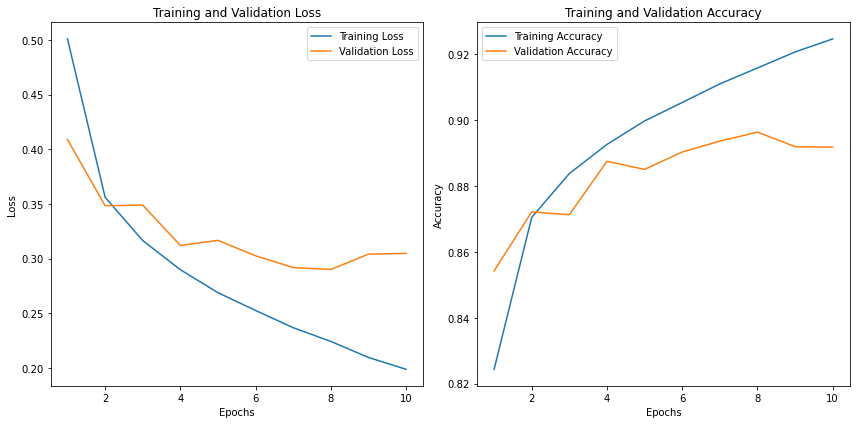

In [65]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Create lists to store the evaluation results
results = []

def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='mish'),
        tf.keras.layers.Dense(128, activation='mish'),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='Nadam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

K = 10
num_val_samples = len(x_train) // K
num_epochs = 10
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

for i in range(K):
    print('processing fold', i)

    # Prepare the validation data
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = x_train[a: b]
    val_targets = y_train[a: b]

    #Prepare the training data
    partial_train_data = np.concatenate([x_train[:a], x_train[b:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:a], y_train[b:]], axis=0)

    model = build_model()

    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=128, verbose=0,
    )

    #history
    train_loss_history.append(history.history['loss'])
    train_accuracy_history.append(history.history['accuracy'])
    val_loss_history.append(history.history['val_loss'])
    val_accuracy_history.append(history.history['val_accuracy'])
    
    #accuracy for the fold
    print(f'Fold {i} - Training Accuracy: {history.history["accuracy"][-1]}, Validation Accuracy: {history.history["val_accuracy"][-1]}')

# Calculate average training and validation metrics
average_train_loss = np.mean(train_loss_history, axis=0)
average_train_accuracy = np.mean(train_accuracy_history, axis=0)
average_val_loss = np.mean(val_loss_history, axis=0)
average_val_accuracy = np.mean(val_accuracy_history, axis=0)

# average accuracy
print(f'Average Training Accuracy: {average_train_accuracy[-1]}, Average Validation Accuracy: {average_val_accuracy[-1]}')


# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), average_train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), average_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), average_train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), average_val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


By increasing the k value there might be small improvements in some folds (like fold 8) but the average accuracy is still lower than 89.35%. We can also observe that our loss is not improving after epoch 4 (the amount of loss keeps between 0.31 and 0.33).

# 7. K-Fold Validation with Shuffling

Within this segment, we'll incorporate shuffling alongside the k-folding process, as detailed in the book.

processing fold 0
Fold 0 - Training Accuracy: 0.9242963194847107, Validation Accuracy: 0.8931666612625122
processing fold 1
Fold 1 - Training Accuracy: 0.926277756690979, Validation Accuracy: 0.8949999809265137
processing fold 2
Fold 2 - Training Accuracy: 0.9257222414016724, Validation Accuracy: 0.9003333449363708
processing fold 3
Fold 3 - Training Accuracy: 0.9246666431427002, Validation Accuracy: 0.9006666541099548
processing fold 4
Fold 4 - Training Accuracy: 0.9242592453956604, Validation Accuracy: 0.8948333263397217
processing fold 5
Fold 5 - Training Accuracy: 0.9252407550811768, Validation Accuracy: 0.9028333425521851
processing fold 6
Fold 6 - Training Accuracy: 0.9241851568222046, Validation Accuracy: 0.8993333578109741
processing fold 7
Fold 7 - Training Accuracy: 0.9252036809921265, Validation Accuracy: 0.8921666741371155
processing fold 8
Fold 8 - Training Accuracy: 0.9247778058052063, Validation Accuracy: 0.8989999890327454
processing fold 9
Fold 9 - Training Accuracy: 0

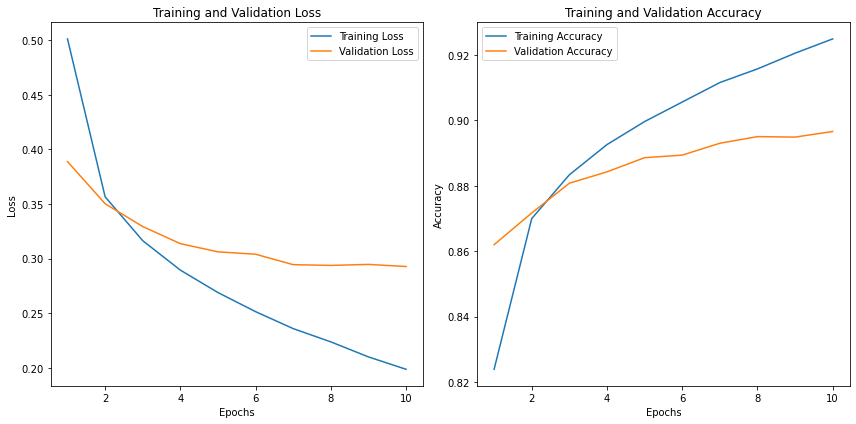

In [66]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Create lists to store the evaluation results
results = []

def build_model(clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='mish'),
        tf.keras.layers.Dense(128, activation='mish'),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='Nadam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

K = 10
num_val_samples = len(x_train) // K
num_epochs = 10
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Combine train and test into a single array for shuffling
data_targets = list(zip(x_train, y_train))
np.random.shuffle(data_targets) 

for i in range(K):
    print('processing fold', i)

    # Split the shuffled data back into train and test
    shuffled_data, shuffled_targets = zip(*data_targets)

    # Prepare the validation data
    a, b = i * num_val_samples, (i + 1) * num_val_samples
    val_data = np.array(shuffled_data[a: b])
    val_targets = np.array(shuffled_targets[a: b])

    #Prepare the training data
    partial_train_data = np.array(list(shuffled_data[:a]) + list(shuffled_data[b:]))
    partial_train_targets = np.array(list(shuffled_targets[:a]) + list(shuffled_targets[b:]))

    model = build_model()

    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=128, verbose=0,
    )

    # history
    train_loss_history.append(history.history['loss'])
    train_accuracy_history.append(history.history['accuracy'])
    val_loss_history.append(history.history['val_loss'])
    val_accuracy_history.append(history.history['val_accuracy'])
    
    #  accuracy for this fold
    print(f'Fold {i} - Training Accuracy: {history.history["accuracy"][-1]}, Validation Accuracy: {history.history["val_accuracy"][-1]}')


# average training and validation metrics
average_train_loss = np.mean(train_loss_history, axis=0)
average_train_accuracy = np.mean(train_accuracy_history, axis=0)
average_val_loss = np.mean(val_loss_history, axis=0)
average_val_accuracy = np.mean(val_accuracy_history, axis=0)

# Print the average
print(f'Average Training Accuracy: {average_train_accuracy[-1]}')
print(f'Average Validation Accuracy: {average_val_accuracy[-1]}')

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), average_train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), average_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')  # Add parentheses here
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), average_train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), average_val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  # Add parentheses here
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The average validation accuracy is becoming better compared to 89.35%.
However, due to heavy processing for using k-fold, I am not going to use this method for further experiments. Another perceptible difference after using k-fold shuffling is the smoothness of our curves both in accuracy and loss compared to k-fold without shuffling. Our accuracy is somehow always increasing by starting from near 86% and ending near 89%.

# 8. Adding Dropout layer

we are going to add a layer drop which is "one of the most effective and most commonly used regularization
techniques for neural networks, Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training."[<sup>[6]</sup>] to our model.





[6]: #References

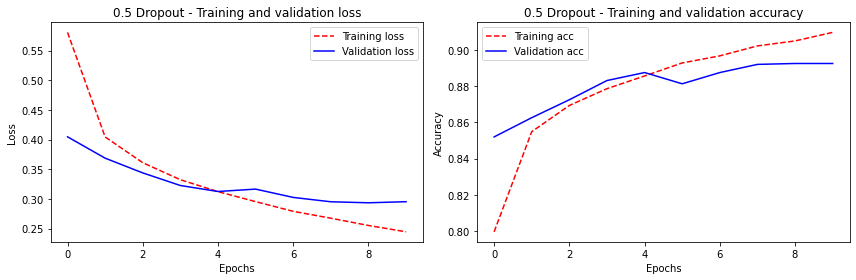

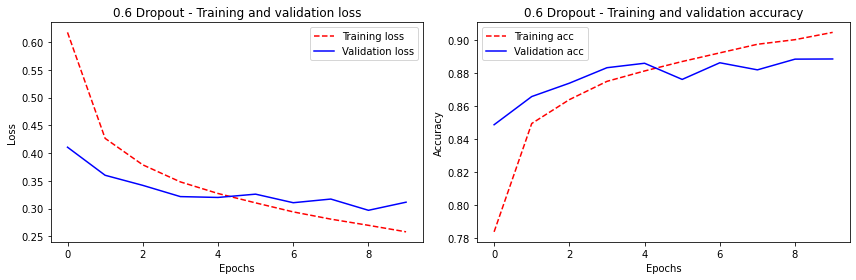

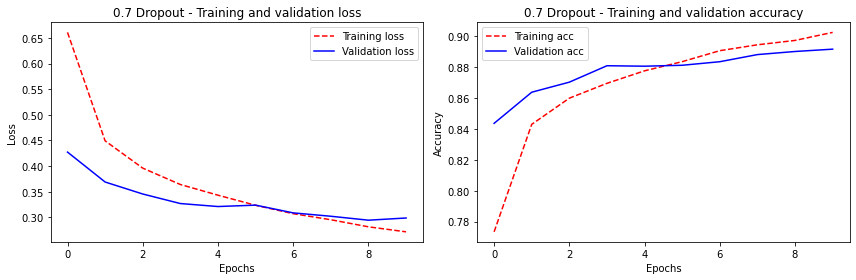

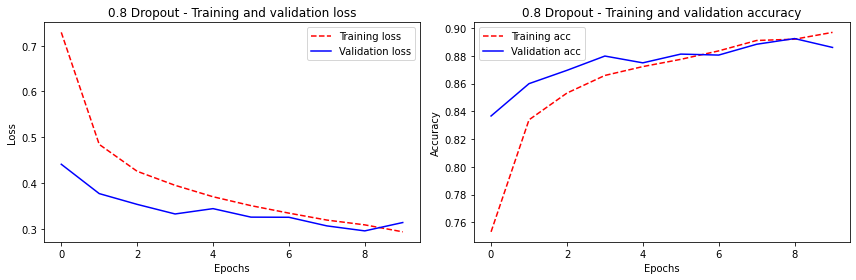

In [67]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

dropout_rates = [0.5, 0.6, 0.7, 0.8]

# Create a list to store the evaluation results
results = []

for dropout_rate in dropout_rates:  
    def build_model(clear=True):
        if clear:
            tf.keras.backend.clear_session()
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='mish'),
            tf.keras.layers.Dense(128, activation='mish'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(10)
        ])
        model.compile(optimizer='Nadam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
        return model

    model = build_model()

    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0
    )

    # hsitory
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    results.append((dropout_rate, val_loss, val_accuracy))

    # plot the loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r--', label="Training loss")
    plt.plot(history.history['val_loss'], 'b', label="Validation loss")
    plt.title(f"{dropout_rate} Dropout - Training and validation loss")  # Corrected variable name
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'r--', label="Training acc")
    plt.plot(history.history['val_accuracy'], 'b', label="Validation acc")
    plt.title(f"{dropout_rate} Dropout - Training and validation accuracy")  # Corrected variable name
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a DataFrame to store the results
df_4 = pd.DataFrame(results, columns=["Dropout Rate", "Val Loss", "Val Accuracy"])


In [68]:
df_4.sort_values('Val Accuracy', ascending=False).reset_index()

index  Dropout Rate  Val Loss  Val Accuracy
0      0           0.5  0.295391        0.8925
1      2           0.7  0.298823        0.8914
2      1           0.6  0.311638        0.8885
3      3           0.8  0.313508        0.8861

It is clear that, in every scenario, our validation data begins to show signs of overfitting within the first 4 epochs, and yet, our highest achieved result remains below 89.35%.

# 9. Adding Regularization

"a common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more regular"[<sup>[6]</sup>]

We will use the regularization on our best validation accuracy from the dropout section, which would be a 0.5 dropout rate.

## 9.1. L2 Regularization

In L2 regularization "The cost added is proportional to the absolute value of the weight coefficients"[<sup>[6]</sup>]

[6]: #References

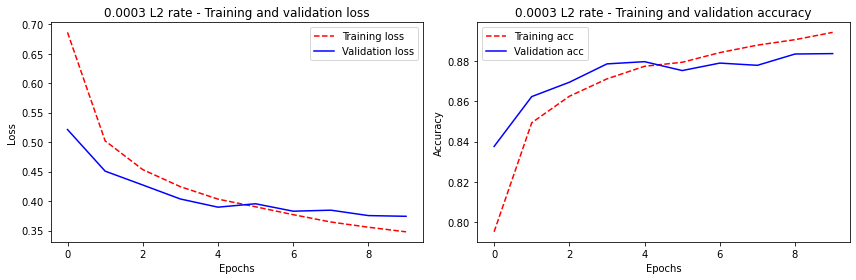

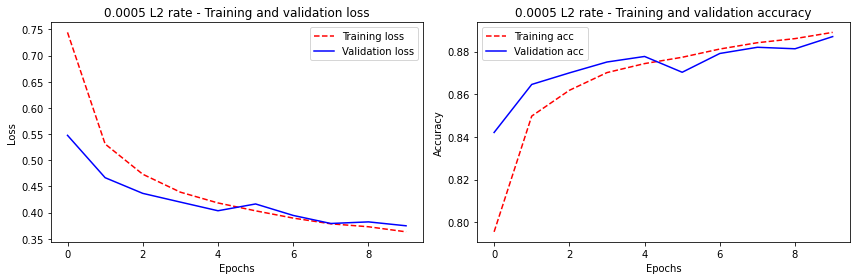

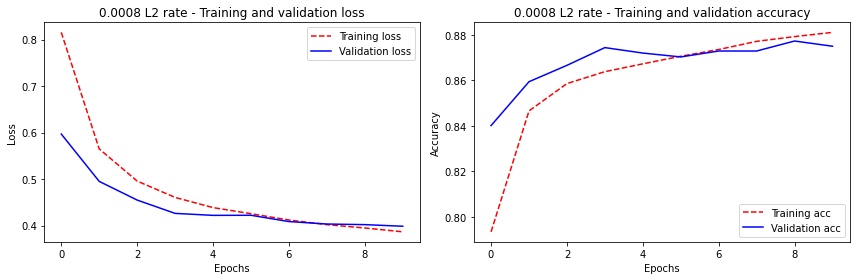

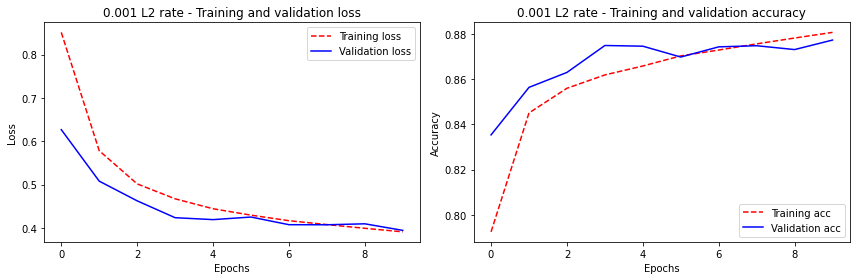

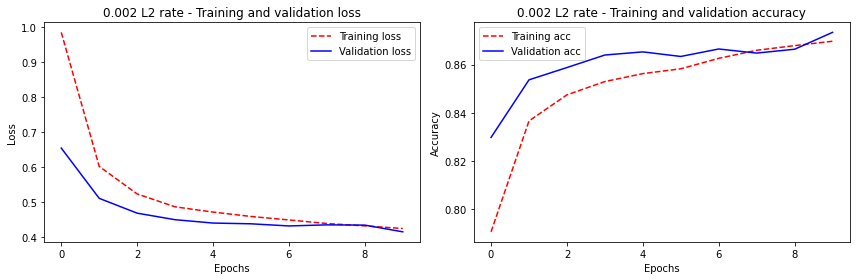

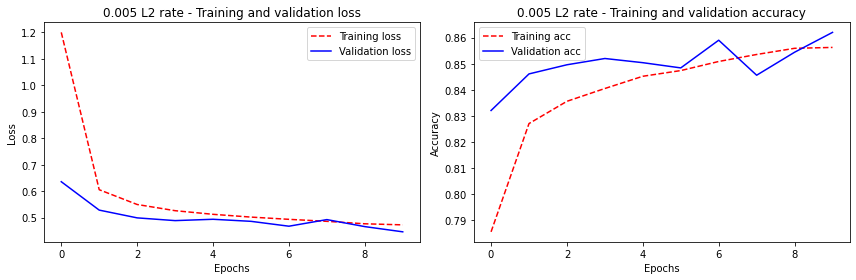

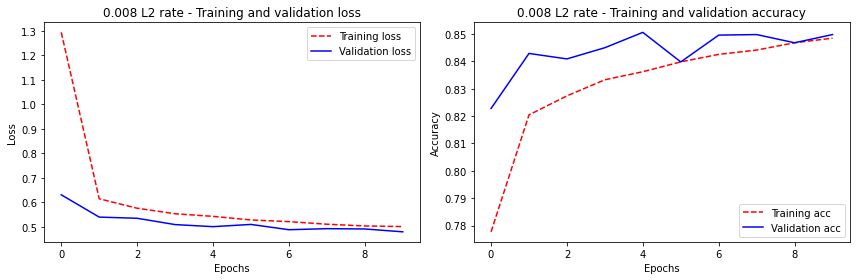

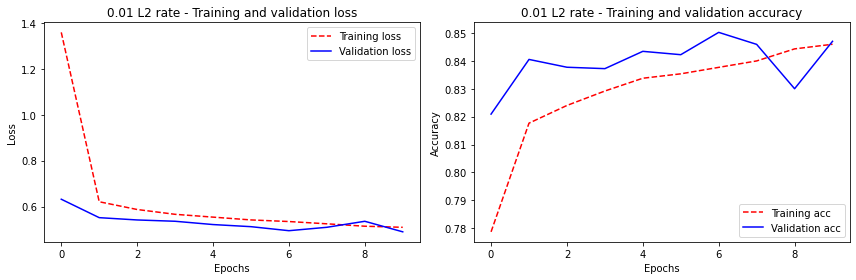

In [71]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

learning_rates = [0.0003 ,0.0005, 0.0008, 0.001, 0.002, 0.005, 0.008, 0.01]

# Create a list to store the evaluation results
results = []

for learning_rate in learning_rates:  
    def build_model(clear=True):
        if clear:
            tf.keras.backend.clear_session()
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(learning_rate) ,activation='mish'),
            tf.keras.layers.Dense(128, activation='mish'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10)
        ])
        model.compile(optimizer='Nadam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
        return model

    model = build_model()

    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0
    )

    # History
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    results.append((learning_rate, val_loss, val_accuracy))

    # Plot the loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r--', label="Training loss")
    plt.plot(history.history['val_loss'], 'b', label="Validation loss")
    plt.title(f"{learning_rate} L2 rate - Training and validation loss")  # Corrected variable name
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'r--', label="Training acc")
    plt.plot(history.history['val_accuracy'], 'b', label="Validation acc")
    plt.title(f"{learning_rate} L2 rate - Training and validation accuracy")  # Corrected variable name
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a DataFrame to store the results
df_5 = pd.DataFrame(results, columns=["L2 Rate", "Val Loss", "Val Accuracy"])


In [73]:
df_5.sort_values('Val Accuracy', ascending=False).reset_index()

index  L2 Rate  Val Loss  Val Accuracy
0      1   0.0005  0.374840        0.8870
1      0   0.0003  0.374253        0.8836
2      3   0.0010  0.394367        0.8772
3      2   0.0008  0.398535        0.8750
4      4   0.0020  0.414509        0.8734
5      5   0.0050  0.446576        0.8620
6      6   0.0080  0.479048        0.8498
7      7   0.0100  0.489627        0.8470

As illustrated by the plots, the insertion of an L2 Regularizer in our model did not resolve the issue of overfitting and, in some cases, worsened it.

## 9.2. L1 Regularization

In L1 regularization "The cost added is proportional to the square of the value of the weight coefficients "[<sup>[6]</sup>]

[6]: #References

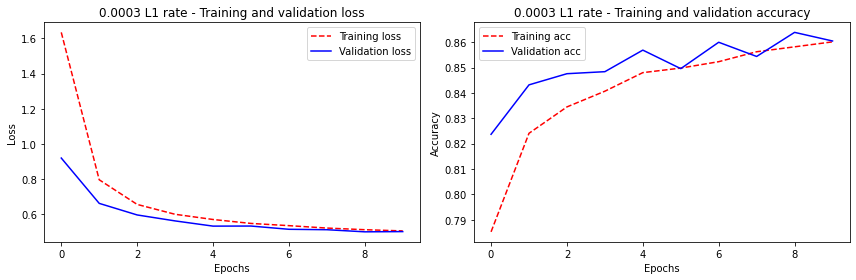

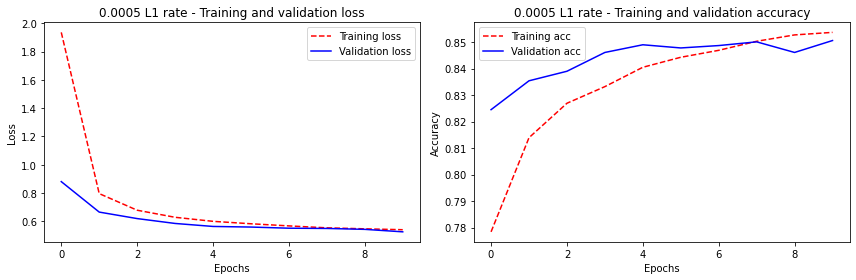

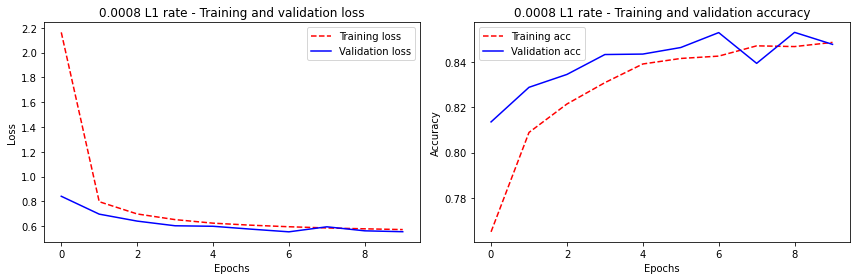

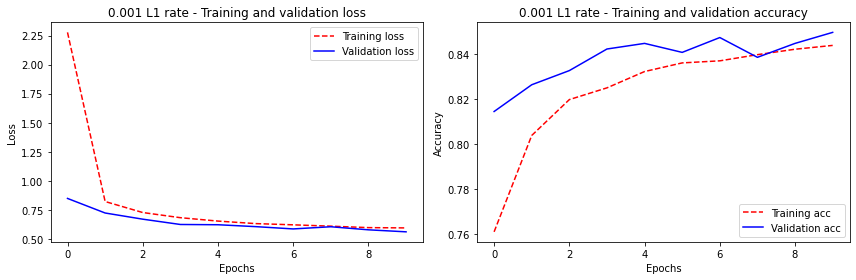

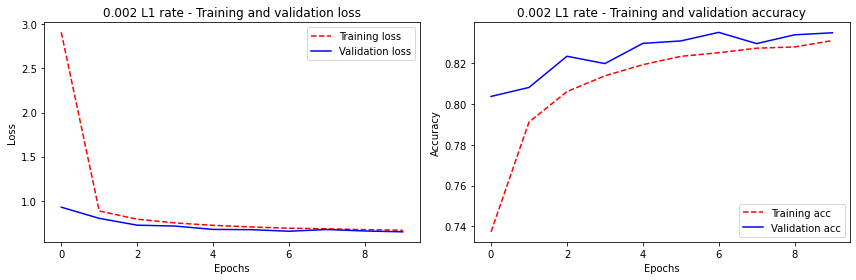

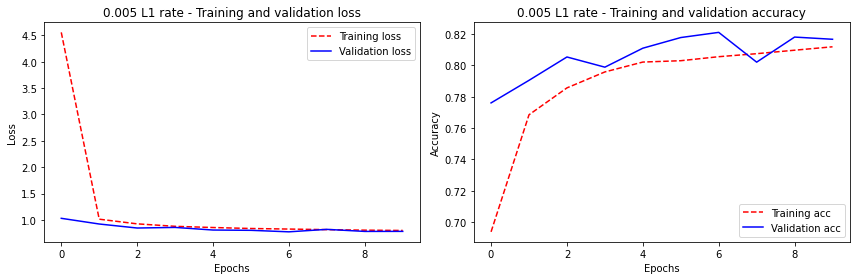

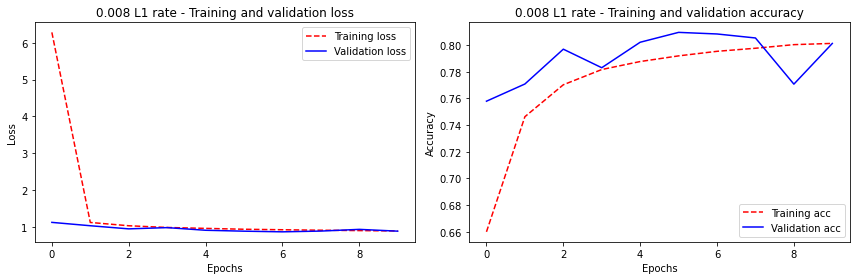

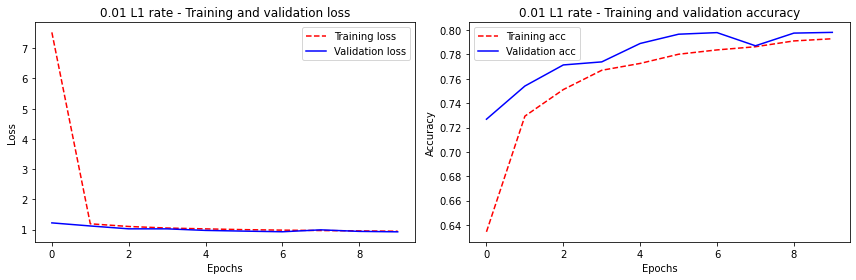

In [74]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

learning_rates = [0.0003 ,0.0005, 0.0008, 0.001, 0.002, 0.005, 0.008, 0.01]

# Create a list to store the evaluation results
results = []

for learning_rate in learning_rates:  
    def build_model(clear=True):
        if clear:
            tf.keras.backend.clear_session()
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l1(learning_rate) ,activation='mish'),
            tf.keras.layers.Dense(128, activation='mish'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10)
        ])
        model.compile(optimizer='Nadam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
        return model

    model = build_model()

    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=10,
        batch_size=128,
        validation_data=(x_val, y_val),
        verbose=0
    )

    # History
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    results.append((learning_rate, val_loss, val_accuracy))

    # Plot the loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r--', label="Training loss")
    plt.plot(history.history['val_loss'], 'b', label="Validation loss")
    plt.title(f"{learning_rate} L1 rate - Training and validation loss")  # Corrected variable name
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'r--', label="Training acc")
    plt.plot(history.history['val_accuracy'], 'b', label="Validation acc")
    plt.title(f"{learning_rate} L1 rate - Training and validation accuracy")  # Corrected variable name
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a DataFrame to store the results
df_6 = pd.DataFrame(results, columns=["L1 Rate", "Val Loss", "Val Accuracy"])


In [75]:
df_6.sort_values('Val Accuracy', ascending=False).reset_index()

index  L1 Rate  Val Loss  Val Accuracy
0      0   0.0003  0.502181        0.8605
1      1   0.0005  0.526202        0.8506
2      3   0.0010  0.560745        0.8498
3      2   0.0008  0.556582        0.8479
4      4   0.0020  0.647171        0.8349
5      5   0.0050  0.782964        0.8167
6      6   0.0080  0.883838        0.8012
7      7   0.0100  0.929613        0.7980

The L1 regularization is also making more overfitting based on the plots.

# 10. Conclusion

In conclusion, our investigation of various hyperparameters for the example has provided valuable insights into the model's performance. We observed that modifying parameters such as the choice of optimizers, activation functions, and the number of neurons in hidden layers had a significant impact on the network's behaviour. However, it is crucial to note that finding the optimal hyperparameters is not always straightforward.

We also encountered cases where some parameter configurations led to overfitting, while others suffered from underfitting or low learning rate. 
Furthermore, using the shuffled K-fold validation allowed us to assess the model's performance and achieve better results.

I tried to use an iterative approach to hyperparameter tuning and make a balance between model complexity and generalization. While our results have 88.89% accuracy (7. K-Fold Validation with Shuffling), there might be other better approaches to increase our accuracy in this dataset.

# References

1. https://www.tensorflow.org/datasets/catalog/fashion_mnist
2. https://github.com/zalandoresearch/fashion-mnist
3. https://keras.io/
4. https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning#:~:text=An%20epoch%20is%20when%20all,dataset%20takes%20around%20an%20algorithm
5. https://medium.com/geekculture/how-does-batch-size-impact-your-model-learning-2dd34d9fb1fa#:~:text=Batch%20Size%20is%20among%20the,your%20models%20hit%20peak%20performance
6. Deep Learning with Python, François Chollet, 2021, Manning Publications 